In [1]:
! pip install seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
! pip freeze > requirements.txt # Para actualizar mi estado de dependencia

In [3]:
! pip install geopandas


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# Carga de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import geopandas as gpd


# Avance 1º

Carga y transformación de los datos
Para este primer avance, el foco está en el procesamiento del dataset proporcionado. El archivo original posee un tamaño considerable, con aproximadamente 21 GB, más de 22 millones de registros y 707 columnas, lo que representa un reto importante en términos de manejo y análisis.

Dado este volumen, el equipo de ingeniería de datos preparó una versión optimizada del conjunto de datos, limitada a los países de Latinoamérica. Este nuevo archivo, en formato CSV, contiene 12.216.057 registros y 50 columnas, lo que mejora significativamente su manejabilidad y permite un análisis más eficiente.

Adicionalmente, se proporcionó un archivo complementario —readme.txt— que incluye la descripción detallada de las columnas seleccionadas, facilitando la comprensión de los datos y su uso en las siguientes etapas del proyecto.

Es fundamental destacar la relevancia de una correcta carga, transformación y limpieza de los datos como base para un análisis confiable y efectivo.

⏺A continuación, se procede a importar el archivo original 'data_latinoamerica.csv' para su posterior limpieza y transformación.

In [5]:
data=pd.read_csv('data_latinoamerica.csv',sep=',') 

⏺ Se comprueba la cantidad de filas y columnas del Dataset.

In [6]:

num_filas, num_columnas = data.shape
print(f'Cantidad de filas: {num_filas}')
print(f'Cantidad de columnas: {num_columnas}')

Cantidad de filas: 12216057
Cantidad de columnas: 50


⏺ Se realiza la seleccion de los países donde BIOGENESYS proyecta su expansion. 

In [7]:
paises_seleccionados=['Argentina', 'Chile', 'Colombia', 'Mexico', 'Peru', 'Brazil']
data_latinoamerica=data[data['country_name'].isin(paises_seleccionados)] # isin para filtrar columnas

In [8]:
np.shape(data_latinoamerica)

(11970289, 50)

⏺ Tratamiento de valores nulos y tipos de datos
Con el objetivo de preparar adecuadamente los datos para su análisis, se procede a identificar y tratar los valores nulos, así como a corregir los tipos de datos en caso de ser necesario.

El primer paso consiste en verificar la cantidad de valores faltantes por columna. Aquellas columnas que presenten un número considerable de datos nulos —específicamente, más de 4 millones de registros ausentes— serán consideradas para su eliminación, ya que podrían afectar negativamente la calidad del análisis.

Este proceso de depuración permitirá trabajar con un conjunto de datos más limpio, coherente y representativo, optimizando así los resultados en las etapas posteriores del proyecto.

In [9]:
data_latinoamerica.isnull().sum()[data_latinoamerica.isnull().sum()>4000000]

new_confirmed                             5620283
new_deceased                              5661788
cumulative_confirmed                      5619937
cumulative_deceased                       5661426
cumulative_vaccine_doses_administered    11706131
population_rural                         11964343
population_urban                         11964343
population_density                       11964343
human_development_index                   6472221
gdp_usd                                  11963352
gdp_per_capita_usd                       11962361
smoking_prevalence                       11964343
diabetes_prevalence                      11964343
infant_mortality_rate                    11964343
nurses_per_1000                          11964343
physicians_per_1000                      11964343
population_largest_city                  11964343
area_rural_sq_km                         11964343
area_urban_sq_km                         11964343
life_expectancy                          11964343


⏺ Realizar un nuevo filtro por la columna "location_key" - Solo para los paises seleccionados

In [10]:
data_latinoamerica_paises = data_latinoamerica[data_latinoamerica['location_key'].isin(['AR', 'CL', 'CO', 'MX', 'PE', 'BR'])]

⏺ Se filtran los datos en fechas mayores a 2021-01-01.

In [11]:
data_latinoamerica_paises_Fecha = data_latinoamerica_paises[data_latinoamerica_paises['date']>'2021-01-01']

⏺ Con el nuevo filtro vamos a ver qué cantidad de elementos tenemos vacíos, en caso de tenerlos, debemos proceder a eliminarlos

In [12]:
# Contamos valores nulos
valores_nulos_fecha = data_latinoamerica_paises_Fecha.isnull().sum()[data_latinoamerica_paises_Fecha.isnull().sum() > 0]
print(valores_nulos_fecha)
print(np.shape(data_latinoamerica_paises_Fecha))

new_confirmed                              21
new_deceased                               21
cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     584
average_temperature_celsius                42
minimum_temperature_celsius                41
maximum_temperature_celsius                41
rainfall_mm                                90
relative_humidity                          42
new_recovered                            2116
cumulative_recovered                     2736
dtype: int64
(3744, 50)


⏺ A continuacion se procede a completar las columnas con datos faltantes de los paises seleccionados, reemplazandolos por la media de la columna del pais. 

In [13]:
# usar un for para completar los valores nulos de las columnas de la media de cada país.
for pais in paises_seleccionados:
    data_latinoamerica_paises_Fecha.loc[data_latinoamerica_paises_Fecha['country_name'] == pais, 'new_confirmed'] = data_latinoamerica_paises_Fecha.loc[data_latinoamerica_paises_Fecha['country_name'] == pais, 'new_confirmed'].fillna(data_latinoamerica_paises_Fecha.loc[data_latinoamerica_paises_Fecha['country_name'] == pais, 'new_confirmed'].mean())
    data_latinoamerica_paises_Fecha.loc[data_latinoamerica_paises_Fecha['country_name'] == pais, 'new_deceased'] = data_latinoamerica_paises_Fecha.loc[data_latinoamerica_paises_Fecha['country_name'] == pais, 'new_deceased'].fillna(data_latinoamerica_paises_Fecha.loc[data_latinoamerica_paises_Fecha['country_name'] == pais, 'new_deceased'].mean())
    #data_latinoamerica_paises_Fecha['new_recovered'] = data_latinoamerica_paises_Fecha['new_recovered'].fillna(...)  # Línea comentada
    data_latinoamerica_paises_Fecha.loc[data_latinoamerica_paises_Fecha['country_name'] == pais, 'cumulative_confirmed'] = data_latinoamerica_paises_Fecha.loc[data_latinoamerica_paises_Fecha['country_name'] == pais, 'cumulative_confirmed'].fillna(data_latinoamerica_paises_Fecha.loc[data_latinoamerica_paises_Fecha['country_name'] == pais, 'cumulative_confirmed'].mean())
    data_latinoamerica_paises_Fecha.loc[data_latinoamerica_paises_Fecha['country_name'] == pais, 'cumulative_deceased'] = data_latinoamerica_paises_Fecha.loc[data_latinoamerica_paises_Fecha['country_name'] == pais, 'cumulative_deceased'].fillna(data_latinoamerica_paises_Fecha.loc[data_latinoamerica_paises_Fecha['country_name'] == pais, 'cumulative_deceased'].mean())
    #data_latinoamerica_paises_Fecha['cumulative_recovered'] = data_latinoamerica_paises_Fecha['cumulative_recovered'].fillna(...)  # Línea comentada
    data_latinoamerica_paises_Fecha.loc[data_latinoamerica_paises_Fecha['country_name'] == pais, 'rainfall_mm'] = data_latinoamerica_paises_Fecha.loc[data_latinoamerica_paises_Fecha['country_name'] == pais, 'rainfall_mm'].fillna(data_latinoamerica_paises_Fecha.loc[data_latinoamerica_paises_Fecha['country_name'] == pais, 'rainfall_mm'].mean())
    data_latinoamerica_paises_Fecha.loc[data_latinoamerica_paises_Fecha['country_name'] == pais, 'relative_humidity'] = data_latinoamerica_paises_Fecha.loc[data_latinoamerica_paises_Fecha['country_name'] == pais, 'relative_humidity'].fillna(data_latinoamerica_paises_Fecha.loc[data_latinoamerica_paises_Fecha['country_name'] == pais, 'relative_humidity'].mean())
    data_latinoamerica_paises_Fecha.loc[data_latinoamerica_paises_Fecha['country_name'] == pais, 'average_temperature_celsius'] = data_latinoamerica_paises_Fecha.loc[data_latinoamerica_paises_Fecha['country_name'] == pais, 'average_temperature_celsius'].fillna(data_latinoamerica_paises_Fecha.loc[data_latinoamerica_paises_Fecha['country_name'] == pais, 'average_temperature_celsius'].mean())
    data_latinoamerica_paises_Fecha.loc[data_latinoamerica_paises_Fecha['country_name'] == pais, 'minimum_temperature_celsius'] = data_latinoamerica_paises_Fecha.loc[data_latinoamerica_paises_Fecha['country_name'] == pais, 'minimum_temperature_celsius'].fillna(data_latinoamerica_paises_Fecha.loc[data_latinoamerica_paises_Fecha['country_name'] == pais, 'minimum_temperature_celsius'].mean())
    data_latinoamerica_paises_Fecha.loc[data_latinoamerica_paises_Fecha['country_name'] == pais, 'maximum_temperature_celsius'] = data_latinoamerica_paises_Fecha.loc[data_latinoamerica_paises_Fecha['country_name'] == pais, 'maximum_temperature_celsius'].fillna(data_latinoamerica_paises_Fecha.loc[data_latinoamerica_paises_Fecha['country_name'] == pais, 'maximum_temperature_celsius'].mean())

# Llenar NaN con el valor de 0 en la columna new_recovered, cumulative_recovered, cumulative_vaccine_doses_administered para hacer análisis de estos datos.
data_latinoamerica_paises_Fecha['new_recovered'] = data_latinoamerica_paises_Fecha['new_recovered'].fillna(0)
data_latinoamerica_paises_Fecha['cumulative_recovered'] = data_latinoamerica_paises_Fecha['cumulative_recovered'].fillna(0)
data_latinoamerica_paises_Fecha['cumulative_vaccine_doses_administered'] = data_latinoamerica_paises_Fecha['cumulative_vaccine_doses_administered'].fillna(0)

C:\Users\Asus\AppData\Local\Temp\ipykernel_11748\2841926072.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica_paises_Fecha['new_recovered'] = data_latinoamerica_paises_Fecha['new_recovered'].fillna(0)
C:\Users\Asus\AppData\Local\Temp\ipykernel_11748\2841926072.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica_paises_Fecha['cumulative_recovered'] = data_latinoamerica_paises_Fecha['cumulative_recovered'].fillna(0)
C:\Users\Asus\AppData\Local\Temp\ipykernel_11748\284

⏺  Nuevamente verificamos la cantidad de instancias vacías y las dimensiones del nuevo dataset.

In [14]:
print(data_latinoamerica_paises_Fecha.isnull().sum()[data_latinoamerica_paises_Fecha.isnull().sum() > 0])
print(np.shape(data_latinoamerica_paises_Fecha))

Series([], dtype: int64)
(3744, 50)


⏺El dataset filtrado por fecha se guarda en un archivo CSV para facilitar su uso en el análisis. Con las nuevas dimensiones, el archivo es más pequeño y fácil de manejar, eliminando la necesidad de cargar el archivo original.

In [54]:
data_latinoamerica_paises_Fecha.to_csv("DatosFinalesFiltrado.csv", index=False)

⏺ Se procede a cargar el nuevo archivo generado anteriormente, para su analisis

In [55]:
data_latinoamerica_paises = pd.read_csv("DatosFinalesFiltrado.csv", sep=',')

⏺ Analiza todas las columnas del DataFrame y muestra sus estadísticas básicas una por una, de forma ordenada. Es útil para obtener un panorama general del contenido y calidad de los datos.

In [56]:
for i in data_latinoamerica_paises.columns:
    print(i)
    print(data_latinoamerica_paises[i].describe())
    print('-------------------------------')

location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
-------------------------------
date
count           3744
unique           624
top       2022-09-01
freq               6
Name: date, dtype: object
-------------------------------
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
-------------------------------
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
-------------------------------
new_confirmed
count      3744.000000
mean      13921.908931
std       24219.361378
min        -573.000000
25%        1536.750000
50%        5214.000000
75%       14834.000000
max      298408.000000
Name: new_confirmed, dtype: float64
-------------------------------
new_deceased
count     3744.000000
mean       276.887411
std        507.240028
min          0.000000
25%         26.000000
50%        100.500000
75%  

⏺ A continuacion se analizan las caracteristicas basicas del Dataset para comprender la distribución de las variables claves.

In [57]:

# Definir las variables clave para el análisis
variables_clave = [
    'new_confirmed', 'new_deceased', 'cumulative_vaccine_doses_administered',
    'population', 'population_density', 'human_development_index',
    'smoking_prevalence', 'diabetes_prevalence', 'life_expectancy',
    'average_temperature_celsius', 'rainfall_mm', 'relative_humidity'
]

# Calcular estadísticas descriptivas para las variables clave
estadisticas_descriptivas = data_latinoamerica_paises[variables_clave].describe()

# Imprimir las estadísticas descriptivas
print("Estadísticas descriptivas:\n", estadisticas_descriptivas)

# Calcular la matriz de correlaciones para las variables clave
correlaciones = data_latinoamerica_paises[variables_clave].corr()

# Imprimir la matriz de correlaciones
print("Correlaciones entre variables:\n", correlaciones)


Estadísticas descriptivas:
        new_confirmed  new_deceased  cumulative_vaccine_doses_administered  \
count    3744.000000   3744.000000                           3.744000e+03   
mean    13921.908931    276.887411                           6.544474e+07   
std     24219.361378    507.240028                           9.247680e+07   
min      -573.000000      0.000000                           0.000000e+00   
25%      1536.750000     26.000000                           2.618297e+06   
50%      5214.000000    100.500000                           3.244576e+07   
75%     14834.000000    312.000000                           7.478108e+07   
max    298408.000000  11447.000000                           3.478685e+08   

         population  population_density  human_development_index  \
count  3.744000e+03         3744.000000              3744.000000   
mean   7.772147e+07           34.266833                 0.777333   
std    6.713776e+07           16.839474                 0.036353   
min   

⏺ A traves del uso de un Bucle For se obtienen las estadisticas descriptivas de las variables claves definidas.

In [58]:

# Calcular estadísticas descriptivas para cada variable clave utilizando un bucle for
for variable in variables_clave:
    estadisticas_descriptivas = data_latinoamerica_paises[variable].describe()
    print(f"Estadísticas descriptivas para {variable}:\n{estadisticas_descriptivas}\n")

# Calcular la matriz de correlaciones para las variables clave
correlaciones = data_latinoamerica_paises[variables_clave].corr()
print("Correlaciones entre variables:\n", correlaciones)


Estadísticas descriptivas para new_confirmed:
count      3744.000000
mean      13921.908931
std       24219.361378
min        -573.000000
25%        1536.750000
50%        5214.000000
75%       14834.000000
max      298408.000000
Name: new_confirmed, dtype: float64

Estadísticas descriptivas para new_deceased:
count     3744.000000
mean       276.887411
std        507.240028
min          0.000000
25%         26.000000
50%        100.500000
75%        312.000000
max      11447.000000
Name: new_deceased, dtype: float64

Estadísticas descriptivas para cumulative_vaccine_doses_administered:
count    3.744000e+03
mean     6.544474e+07
std      9.247680e+07
min      0.000000e+00
25%      2.618297e+06
50%      3.244576e+07
75%      7.478108e+07
max      3.478685e+08
Name: cumulative_vaccine_doses_administered, dtype: float64

Estadísticas descriptivas para population:
count    3.744000e+03
mean     7.772147e+07
std      6.713776e+07
min      1.757400e+07
25%      2.938188e+07
50%      4.79108

⏺En el analisis anterior se ha detectado que la minima dentro de la columna de casos confirmados es -573.00000, lo cual es un error, ya que no pueden existir casos confirmados en negativo, por tal motivo en el paso siguiente se procede a su limpieza.

In [59]:
# Filtrar el DataFrame para mantener solo las filas donde 'new_confirmed' es mayor o igual a 0
# Esto se hace para eliminar cualquier entrada con un número negativo de casos confirmados,
# lo cual podría ser un error en los datos o una entrada no válida.

data_latinoamerica_paises = data_latinoamerica_paises[data_latinoamerica_paises['new_confirmed'] >= 0]

⏺ A continuacion volvemos a imprimir las estadisticas descriptivas de las variables claves para verificar la correccion del error

In [60]:
# Calcular estadísticas descriptivas para cada variable clave utilizando un bucle for
for variable in variables_clave:
    estadisticas_descriptivas = data_latinoamerica_paises[variable].describe()
    print(f"Estadísticas descriptivas para {variable}:\n{estadisticas_descriptivas}\n")

Estadísticas descriptivas para new_confirmed:
count      3743.000000
mean      13925.781469
std       24221.437995
min           0.000000
25%        1538.500000
50%        5220.000000
75%       14838.000000
max      298408.000000
Name: new_confirmed, dtype: float64

Estadísticas descriptivas para new_deceased:
count     3743.00000
mean       276.83181
std        507.29639
min          0.00000
25%         26.00000
50%        100.00000
75%        311.50000
max      11447.00000
Name: new_deceased, dtype: float64

Estadísticas descriptivas para cumulative_vaccine_doses_administered:
count    3.743000e+03
mean     6.540292e+07
std      9.245375e+07
min      0.000000e+00
25%      2.612608e+06
50%      3.243037e+07
75%      7.477025e+07
max      3.478685e+08
Name: cumulative_vaccine_doses_administered, dtype: float64

Estadísticas descriptivas para population:
count    3.743000e+03
mean     7.768545e+07
std      6.711053e+07
min      1.757400e+07
25%      2.938188e+07
50%      4.493871e+07
75


Preguntas del Avance 1º

1- ¿Qué implican estas métricas y cómo pueden ayudar en el análisis de datos?
Las estadísticas descriptivas, como la media, desviación estándar, valores mínimo y máximo, así como los percentiles, ofrecen una visión resumida de la distribución de las variables numéricas en el conjunto de datos. Estas métricas permiten identificar tendencias generales, variabilidad y posibles valores atípicos, lo cual es fundamental para comprender la evolución de la pandemia de COVID-19 y otros factores relevantes en los diferentes países analizados.

2- ¿Se muestran todas las estadísticas en todas las columnas durante el análisis?
No. Estas estadísticas se aplican principalmente a columnas que contienen datos numéricos. Las variables categóricas no son compatibles con este tipo de métricas, ya que su naturaleza no permite cálculos como la media o la desviación estándar.

3- ¿Cuál es la razón de la respuesta anterior y cómo podría afectar la interpretación de los resultados obtenidos?
La razón radica en que las estadísticas descriptivas están diseñadas para datos cuantitativos. Intentar aplicarlas a variables cualitativas podría llevar a conclusiones erróneas o poco relevantes. Por eso, es crucial identificar correctamente el tipo de cada variable antes de aplicar técnicas de análisis, ya que una mala interpretación podría afectar la calidad y la utilidad de los insights obtenidos.

⏺ A continuacion se crea una funcion para la mediana, varianza y el rango.

In [61]:

# Función para calcular la mediana, varianza y rango
def calcular_estadisticas(data, columna):
    mediana = data[columna].median()
    varianza = data[columna].var()
    rango = data[columna].max() - data[columna].min()
    return {'mediana': mediana, 'varianza': varianza, 'rango': rango}

# Uso de la función
estadisticas_new_confirmed = calcular_estadisticas(data_latinoamerica_paises, 'new_confirmed')
print(f"Estadísticas para 'new_confirmed':\n{estadisticas_new_confirmed}")

estadisticas_new_deceased = calcular_estadisticas(data_latinoamerica_paises, 'new_deceased')
print(f"Estadísticas para 'new_deceased':\n{estadisticas_new_deceased}")



Estadísticas para 'new_confirmed':
{'mediana': np.float64(5220.0), 'varianza': np.float64(586678058.5667742), 'rango': np.float64(298408.0)}
Estadísticas para 'new_deceased':
{'mediana': np.float64(100.0), 'varianza': np.float64(257349.62695695387), 'rango': np.float64(11447.0)}


Preguntas del Avance 1º

1- ¿Qué representa la mediana?
La mediana es el valor que se encuentra en el centro de un conjunto de datos ordenado. Es una medida de tendencia central robusta, ya que no se ve afectada por valores extremos o atípicos, y proporciona una representación más precisa del "valor típico" cuando los datos están sesgados.

2- ¿Cómo varía la dispersión de los datos en términos de la varianza y el rango?
La varianza cuantifica cuánto se alejan, en promedio, los valores del conjunto respecto a la media, reflejando la dispersión interna. Por otro lado, el rango es la diferencia entre el valor máximo y el mínimo, ofreciendo una visión general del intervalo en el que se distribuyen los datos.

3- ¿Qué nos indica esto sobre la consistencia o la variabilidad de los datos?
Cuando la varianza y el rango son elevados, se evidencia una alta variabilidad en los datos, lo que puede indicar diferencias significativas entre observaciones. En contraste, una varianza baja y una mediana próxima a la media sugieren que los datos son más consistentes y homogéneos, facilitando la interpretación y el modelado posterior.

📈 Extra Credit Funciones de Oreden Superior

⏺ A continuacion se utiliza (map) para aplicar una funcion de escala,  a cada valor de la columna "new_confirmed", el objetivo es tomar cada uno de los valores y dividirlos por 1000, esto se hace para normalizar y facilitar la visualizacion de los datos.

In [62]:

# Función para escalar los valores
def escalar_valor(valor):
    return valor / 1000  # Escalar dividiendo por 1000

# Aplicar la función de orden superior 'map' a la columna 'new_confirmed'
data_latinoamerica_paises['new_confirmed_scaled'] = data_latinoamerica_paises['new_confirmed'].map(escalar_valor)

# Mostrar los primeros 5 registros para verificar el resultado
print(data_latinoamerica_paises[['new_confirmed', 'new_confirmed_scaled']].head())


   new_confirmed  new_confirmed_scaled
0         7767.0                 7.767
1         4934.0                 4.934
2        13953.0                13.953
3        14085.0                14.085
4        14496.0                14.496


# Avance 2º

⏺ Análisis Estadístico con Pandas y Numpy:

Se llevó a cabo un análisis estadístico detallado utilizando las librerías Pandas y NumPy con el objetivo de explorar las propiedades del conjunto de datos filtrado por país. Este análisis incluyó el cálculo de medidas de tendencia central (media, mediana), dispersión (desviación estándar, varianza, rango) y correlaciones entre variables numéricas.

Estas métricas permitieron obtener una visión clara del comportamiento general de los datos, identificando patrones relevantes, valores atípicos y posibles relaciones entre variables clave. Esta etapa es fundamental para comprender el contexto sanitario actual en cada país y orientar decisiones estratégicas sobre las áreas que requieren mayor atención o inversión.

El análisis se centró exclusivamente en los registros de países latinoamericanos seleccionados, permitiendo así una interpretación más enfocada y específica de la situación regional.

✅a) Medidas de Tendencia Central y Dispersión

In [63]:
# Definir las variables clave para el análisis
variables_clave = [
    'new_confirmed', 'new_deceased', 'cumulative_vaccine_doses_administered',
    'population', 'population_density', 'human_development_index',
    'smoking_prevalence', 'diabetes_prevalence', 'life_expectancy',
    'average_temperature_celsius', 'rainfall_mm', 'relative_humidity'
]

# Calcular estadísticas descriptivas para las variables clave
estadisticas_descriptivas = data_latinoamerica_paises[variables_clave].describe()

# Imprimir las estadísticas descriptivas
print("Estadísticas descriptivas:\n", estadisticas_descriptivas)


Estadísticas descriptivas:
        new_confirmed  new_deceased  cumulative_vaccine_doses_administered  \
count    3743.000000    3743.00000                           3.743000e+03   
mean    13925.781469     276.83181                           6.540292e+07   
std     24221.437995     507.29639                           9.245375e+07   
min         0.000000       0.00000                           0.000000e+00   
25%      1538.500000      26.00000                           2.612608e+06   
50%      5220.000000     100.00000                           3.243037e+07   
75%     14838.000000     311.50000                           7.477025e+07   
max    298408.000000   11447.00000                           3.478685e+08   

         population  population_density  human_development_index  \
count  3.743000e+03         3743.000000              3743.000000   
mean   7.768545e+07           34.269194                 0.777340   
std    6.711053e+07           16.841105                 0.036356   
min   

⏺ Visualización de Nuevos Casos Confirmados y Distribución de Vacunación
A continuación, se presentan dos gráficos clave para el análisis:

Gráfico 1: Representa la distribución de los nuevos casos confirmados de COVID-19 en los países seleccionados. Esta visualización permite identificar patrones de propagación del virus y comparar la incidencia entre regiones.

Gráfico 2: Muestra la distribución del porcentaje de vacunación por país. Este gráfico es fundamental para evaluar el alcance de las campañas de vacunación y detectar posibles brechas en la cobertura.

Ambas visualizaciones ofrecen una perspectiva clara sobre el estado actual de la pandemia y apoyan la toma de decisiones informadas en cuanto a estrategias de contención y priorización de recursos sanitarios.

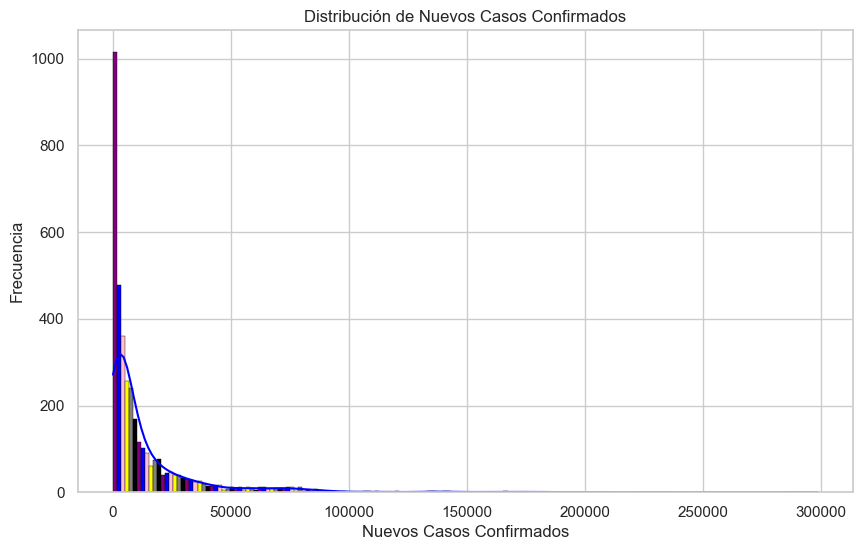

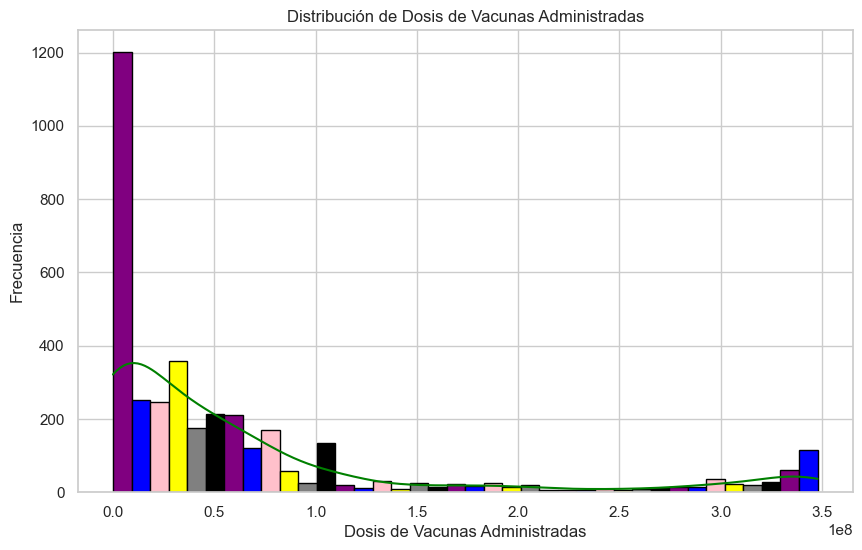

In [64]:
# Configurar estilo gráfico
sns.set(style="whitegrid")

# Crear un histograma  para 'new_confirmed' 
plt.figure(figsize=(10, 6))
colors = ['purple', 'blue', 'pink', 'yellow', 'grey', 'black']
sns.histplot(data_latinoamerica_paises['new_confirmed'], kde=True, edgecolor='black', color='blue')
for i, bar in enumerate(plt.gca().patches):
    bar.set_facecolor(colors[i % len(colors)])
plt.title('Distribución de Nuevos Casos Confirmados')
plt.xlabel('Nuevos Casos Confirmados')
plt.ylabel('Frecuencia')
plt.show()

# Crear un histograma  para 'cumulative_vaccine_doses_administered'
plt.figure(figsize=(10, 6))
sns.histplot(data_latinoamerica_paises['cumulative_vaccine_doses_administered'], kde=True, edgecolor='black', color='green')
for i, bar in enumerate(plt.gca().patches):
    bar.set_facecolor(colors[i % len(colors)])
plt.title('Distribución de Dosis de Vacunas Administradas')
plt.xlabel('Dosis de Vacunas Administradas')
plt.ylabel('Frecuencia')
plt.show()

⏺A continuacion se visualiza un grafico de barras con la distribucion de casos confirmados por paises. 

C:\Users\Asus\AppData\Local\Temp\ipykernel_11748\1107946965.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country_name', y='new_confirmed', data=data_grouped, palette=colors, edgecolor='black')


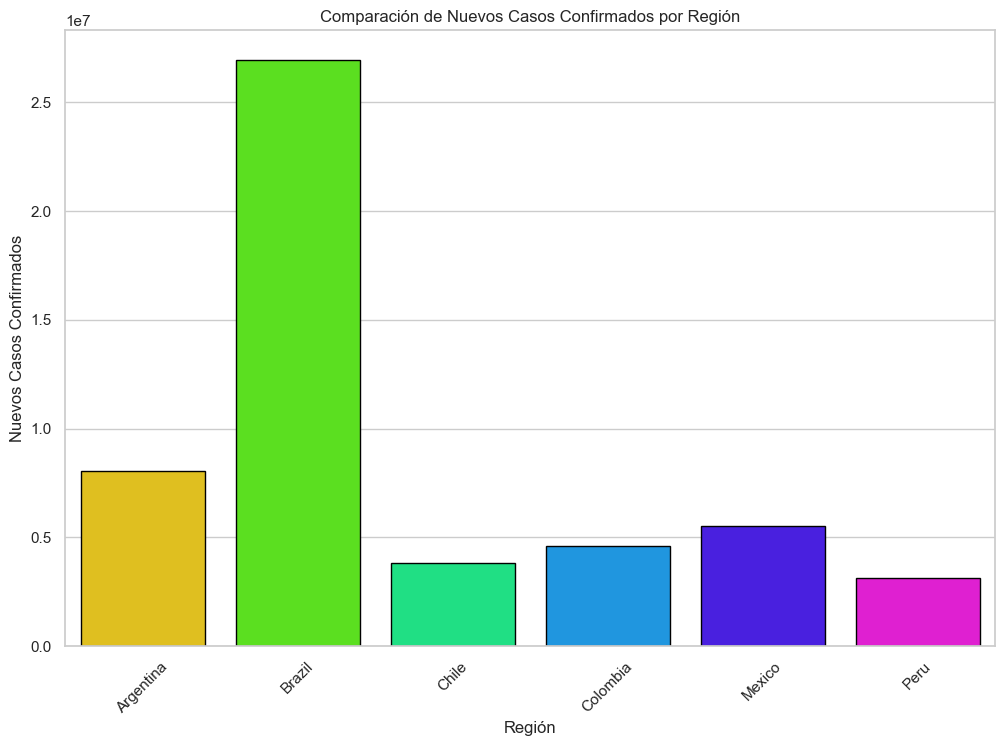

In [65]:
# Configurar estilo gráfico
sns.set(style="whitegrid")

# Agrupar por país y calcular la suma de nuevos casos confirmados
data_grouped = data_latinoamerica_paises.groupby('country_name')['new_confirmed'].sum().reset_index()

# Crear un gráfico de barras para comparar diferentes regiones
plt.figure(figsize=(12, 8))
colors = sns.color_palette("hsv", len(data_grouped))
sns.barplot(x='country_name', y='new_confirmed', data=data_grouped, palette=colors, edgecolor='black')
plt.title('Comparación de Nuevos Casos Confirmados por Región')
plt.xlabel('Región')
plt.ylabel('Nuevos Casos Confirmados')
plt.xticks(rotation=45)
plt.show()


⏺ A continuacion se puede visualizar un Mapa de Calor, donde se observan las principales variables analizadas y sus correlaciones. 

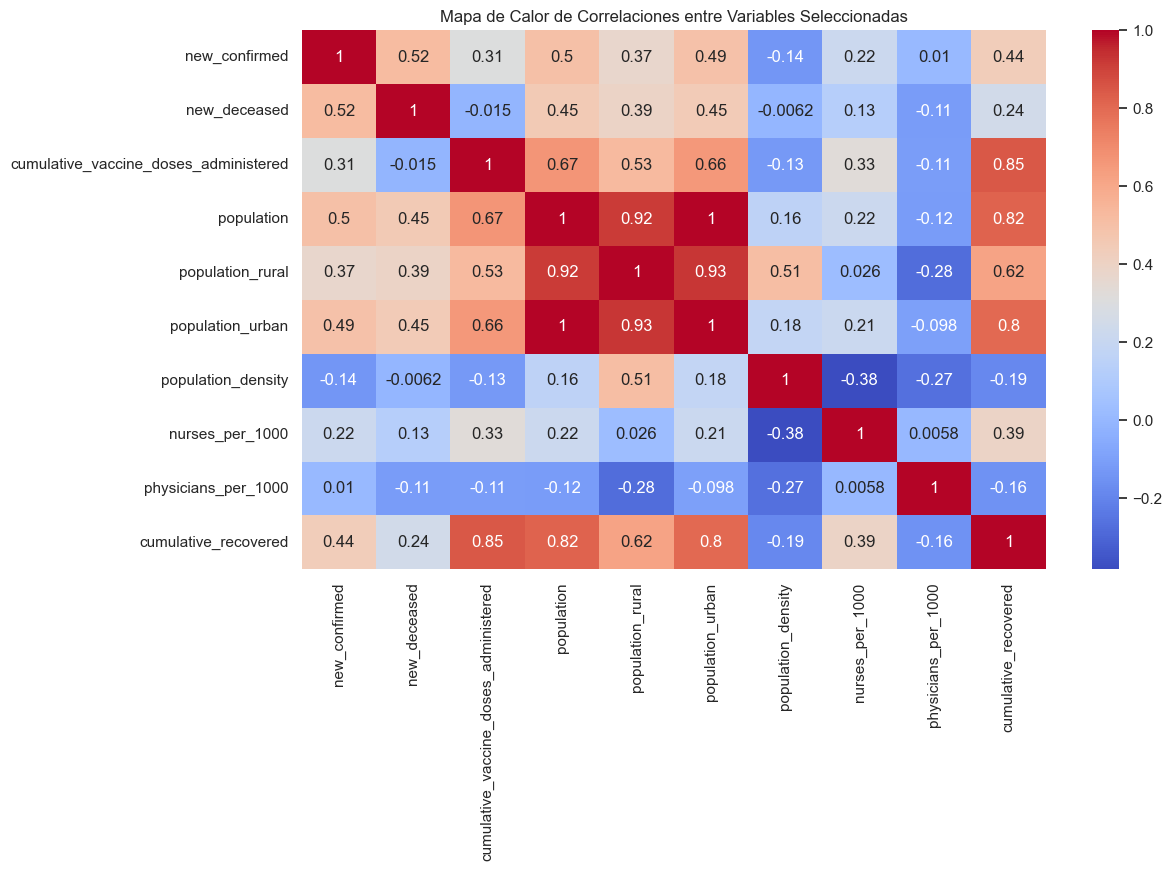

In [66]:

# Definir las variables seleccionadas
variables_seleccionadas = [
    'new_confirmed', 'new_deceased', 'cumulative_vaccine_doses_administered',
    'population', 'population_rural', 'population_urban', 'population_density', 
    'nurses_per_1000', 'physicians_per_1000', 'cumulative_recovered'
]

# Calcular la matriz de correlaciones
correlaciones = data_latinoamerica_paises[variables_seleccionadas].corr()

# Crear un mapa de calor para identificar correlaciones entre las variables seleccionadas
plt.figure(figsize=(12, 7))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlaciones entre Variables Seleccionadas')
plt.show()



⏺A continuacion se visualiza un mapa de calor donde se utiliza una mascara con datos mayores a 0.5.

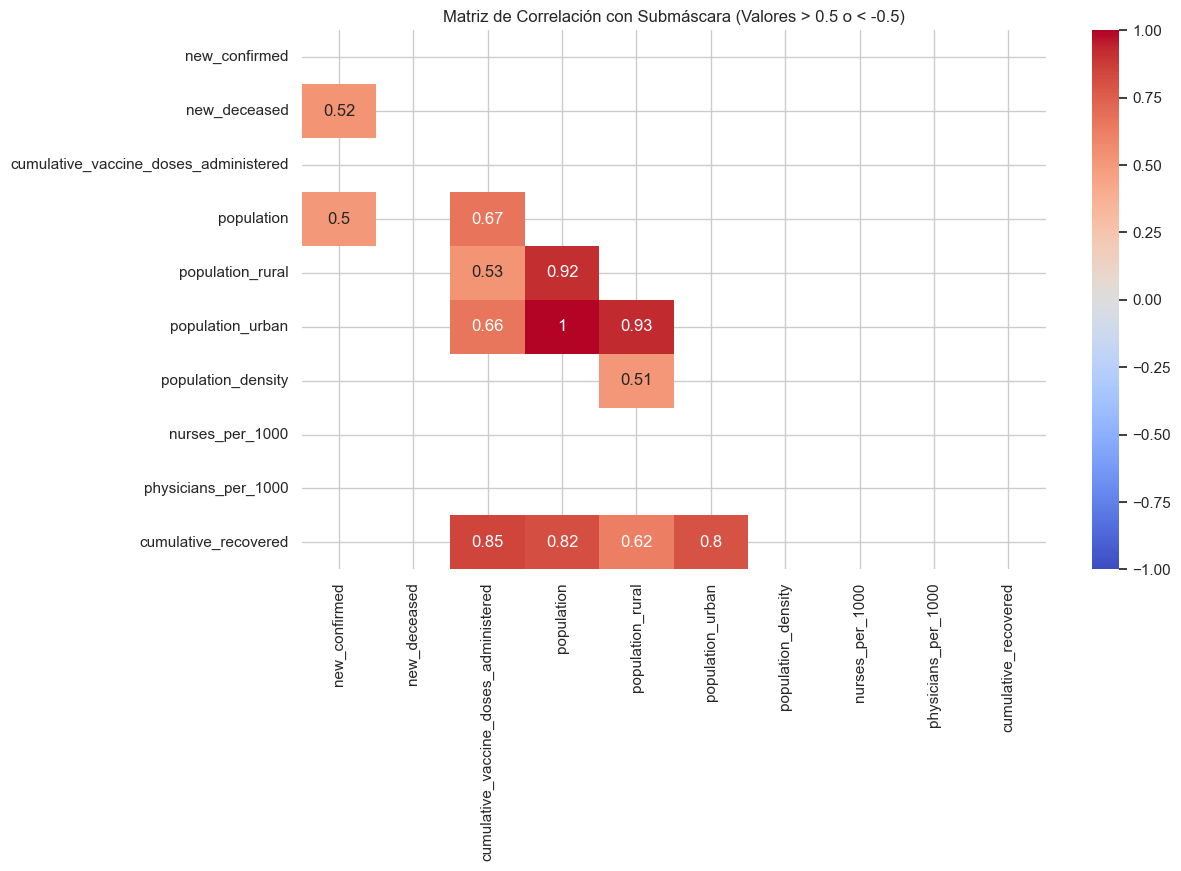

In [67]:
# Crear una máscara para el triángulo superior
mask = np.triu(np.ones_like(correlaciones, dtype=bool))

# Filtrar las correlaciones mayores a 0.5 y menores a -0.5
correlaciones_filtradas = correlaciones[(correlaciones > 0.5) | (correlaciones < -0.5)].dropna(how='all', axis=0).dropna(how='all', axis=1)

# Crear el mapa de calor con la submáscara
plt.figure(figsize=(12, 7))
sns.heatmap(correlaciones_filtradas, annot=True, cmap='coolwarm', mask=mask, vmin=-1, vmax=1)
plt.title('Matriz de Correlación con Submáscara (Valores > 0.5 o < -0.5)')
plt.show()

⏺ En el siguiente diagrama de dispercion se puede observar la correlacion entre las temperaturas medias, y la cantidad de muertes por pais. 

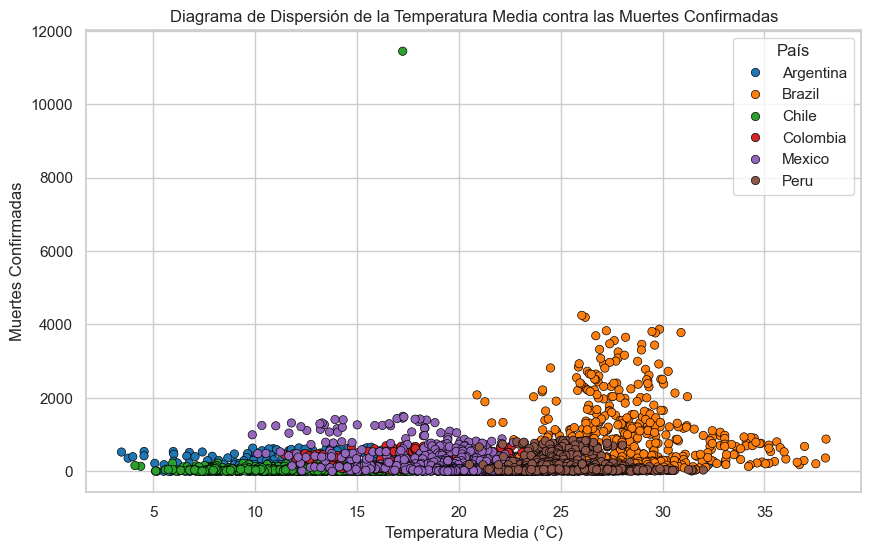

In [68]:
# Crear un diagrama de dispersión de la temperatura media contra las muertes confirmadas
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_latinoamerica_paises, x='average_temperature_celsius', y='new_deceased', hue='country_name', palette='tab10', edgecolor='black')
plt.title('Diagrama de Dispersión de la Temperatura Media contra las Muertes Confirmadas')
plt.xlabel('Temperatura Media (°C)')
plt.ylabel('Muertes Confirmadas')
plt.legend(title='País')
plt.show()


⏺ Analisis de variables consideradas relevantes a traves de un mapa de calor

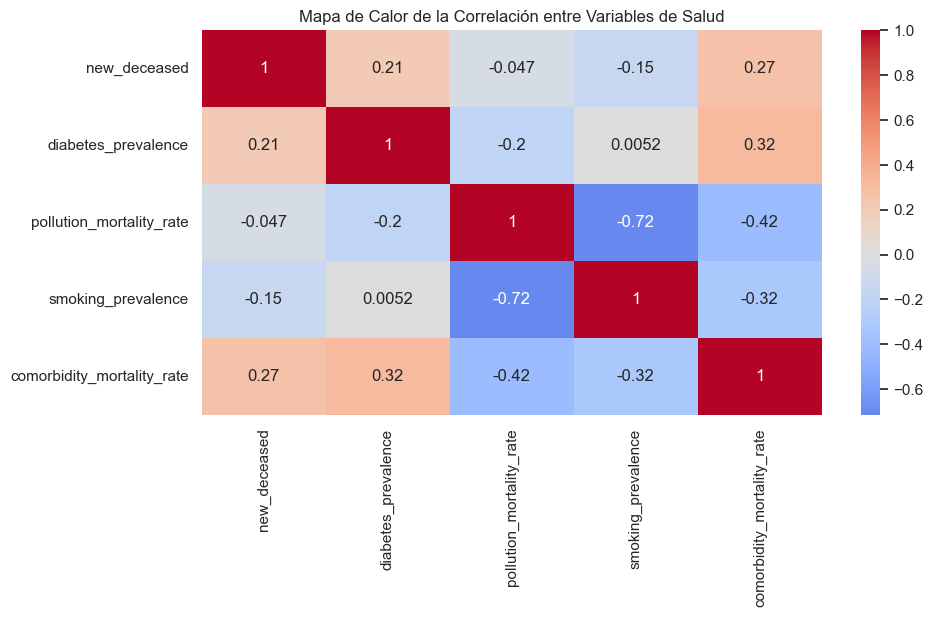

In [69]:
# Seleccionar las columnas relevantes para el análisis
variables_interes = [
    'new_deceased', 'diabetes_prevalence', 'pollution_mortality_rate',
    'smoking_prevalence', 'comorbidity_mortality_rate'
]

# Crear un DataFrame con las variables seleccionadas
df_interes = data_latinoamerica_paises[variables_interes].copy()

# Crear un mapa de calor de la correlación entre las variables
correlacion = df_interes.corr()

plt.figure(figsize=(10, 5))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', center=0)
plt.title('Mapa de Calor de la Correlación entre Variables de Salud')
plt.show()




⏺ Avance 3º: Análisis de Series Temporales

Este avance se enfoca en el análisis de series temporales y variables clave para identificar tendencias y comportamientos relevantes que orienten la expansión estratégica de BIOGENESYS en América Latina.

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

⏺ Analisis de Casos Activos Vs. Recuperados

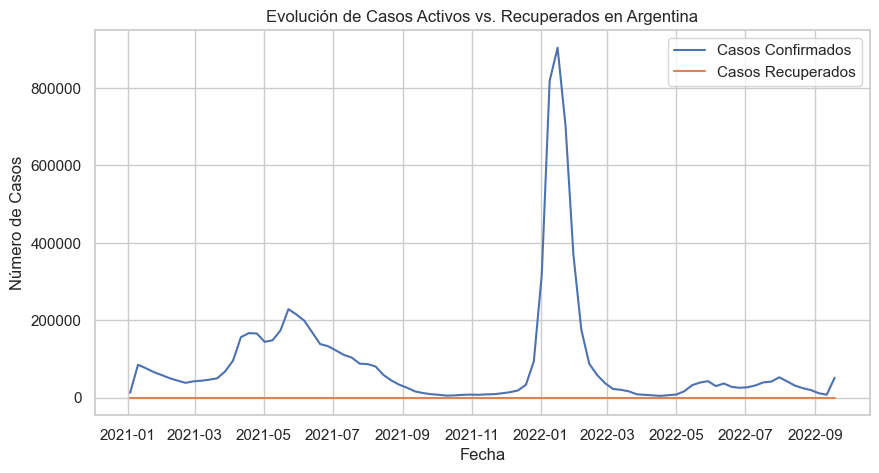

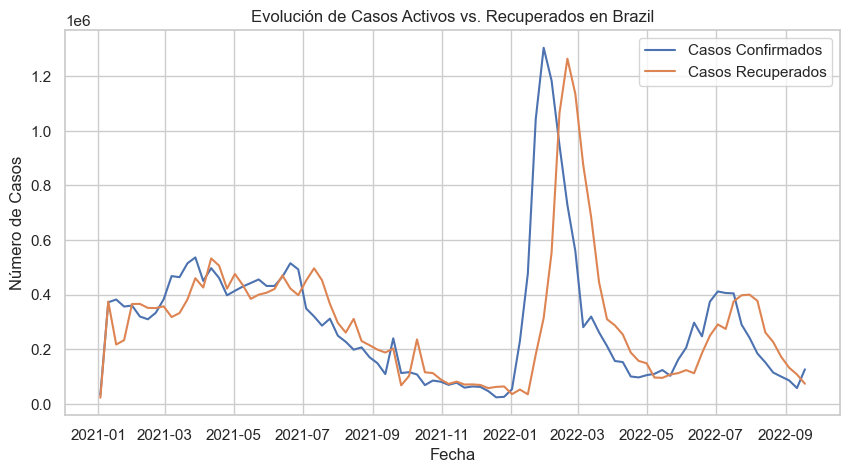

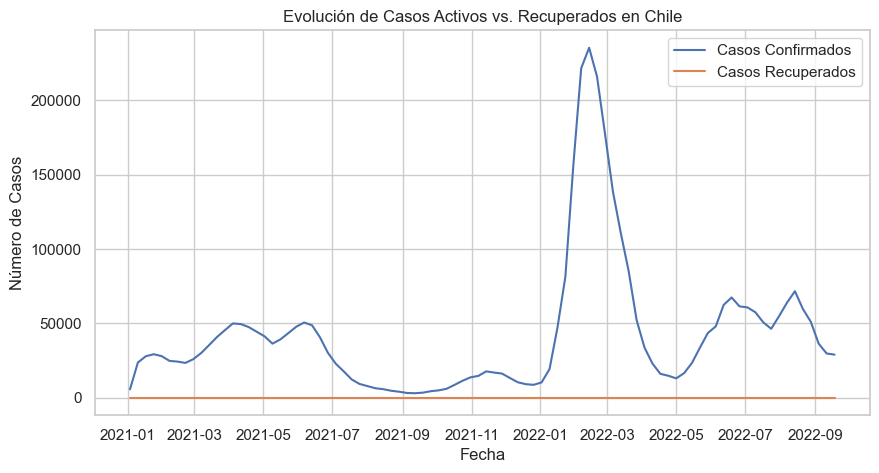

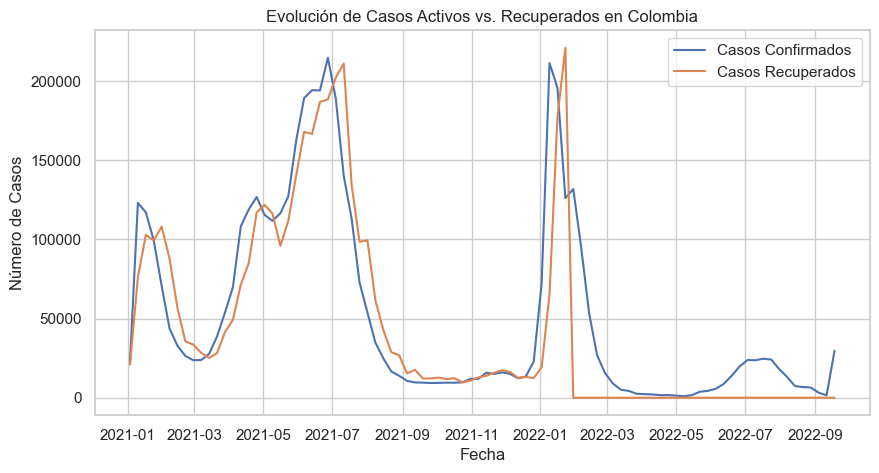

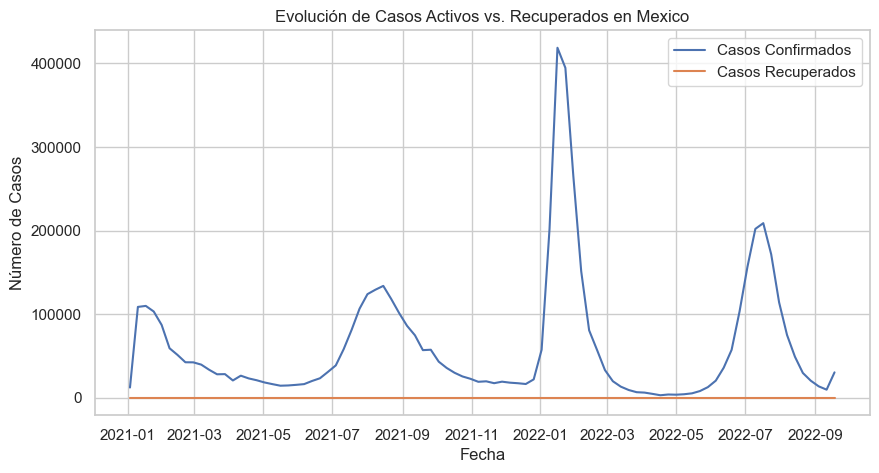

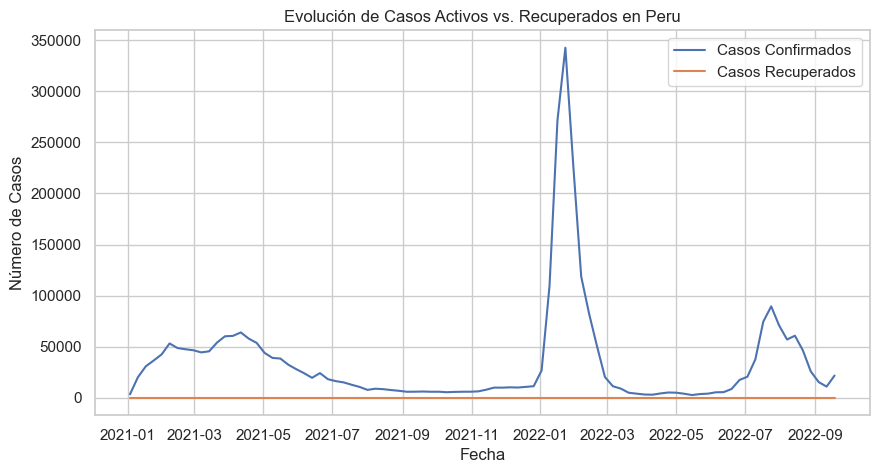

In [72]:
# Asegúrate de que la columna 'date' esté en formato datetime
data_latinoamerica_paises['date'] = pd.to_datetime(data_latinoamerica_paises['date'])

# Iterar sobre cada país en el DataFrame
paises_interes = data_latinoamerica_paises['country_name'].unique()

for pais in paises_interes:
    country_data = data_latinoamerica_paises[data_latinoamerica_paises['country_name'] == pais]
    country_data_weekly = country_data.resample('W', on='date').sum()

    # Evolución de Casos Activos vs. Recuperados
    plt.figure(figsize=(10, 5))
    plt.plot(country_data_weekly.index, country_data_weekly['new_confirmed'], label='Casos Confirmados')
    plt.plot(country_data_weekly.index, country_data_weekly['new_recovered'], label='Casos Recuperados')
    plt.title(f'Evolución de Casos Activos vs. Recuperados en {pais}')
    plt.xlabel('Fecha')
    plt.ylabel('Número de Casos')
    plt.legend()
    plt.show()

⏺ Descomposición de series temporales y Análisis de autocorrelación

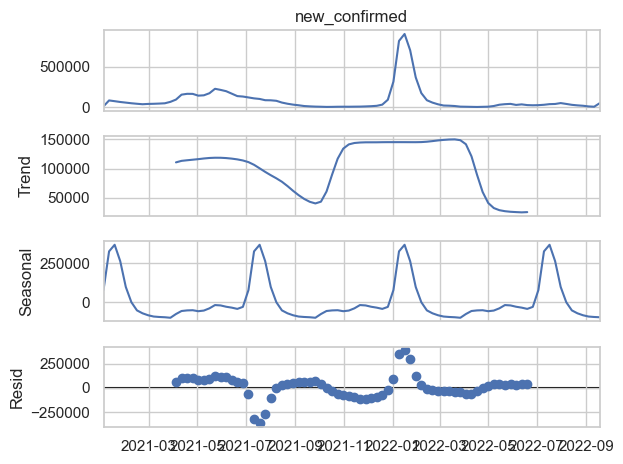

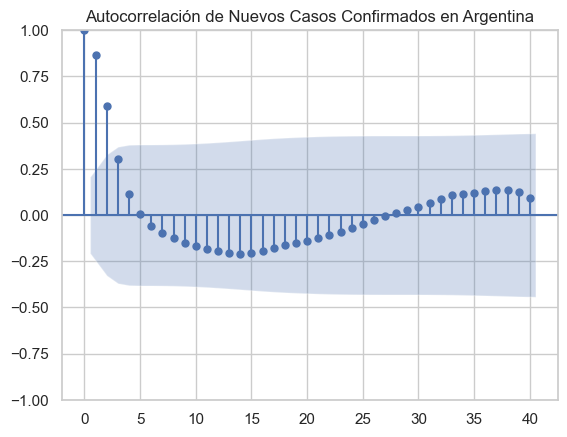

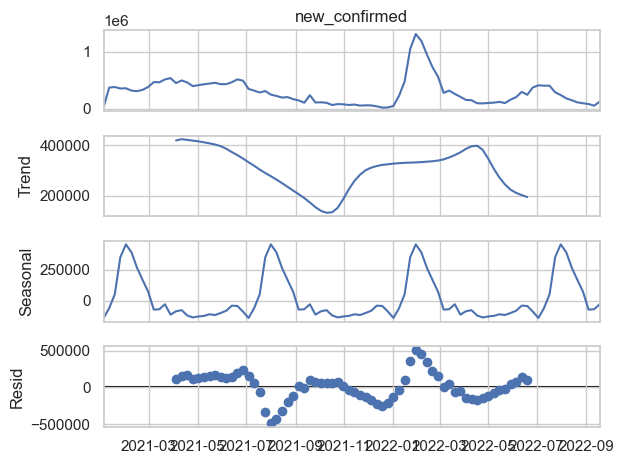

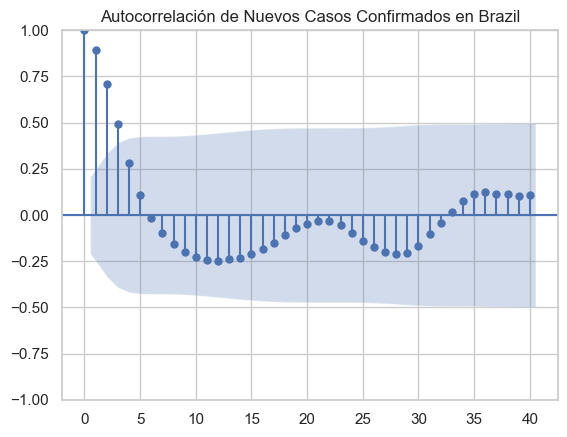

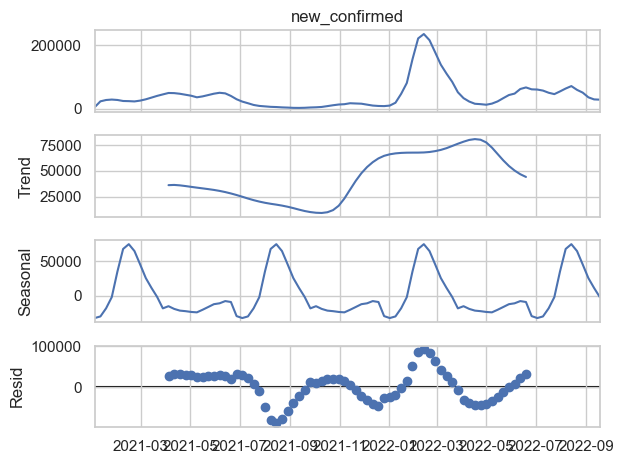

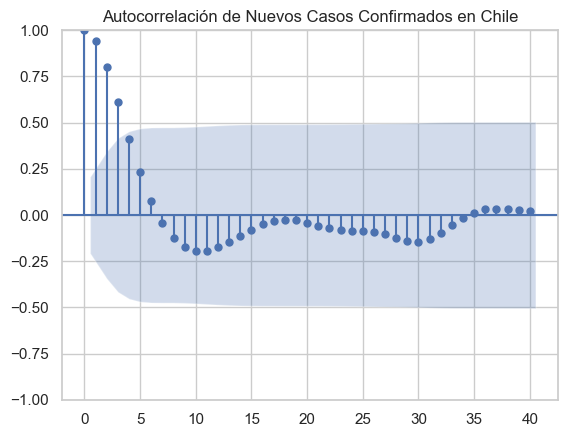

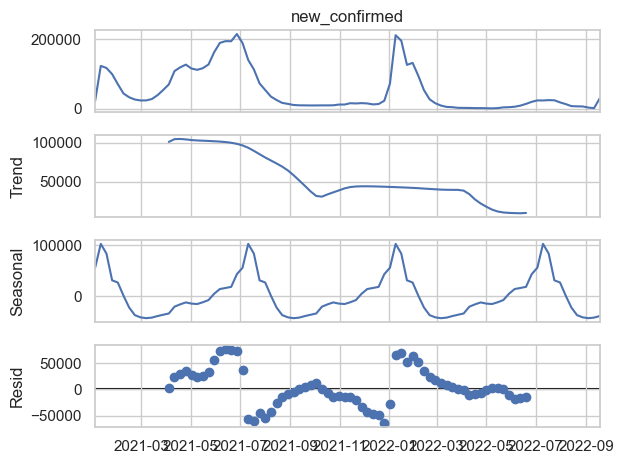

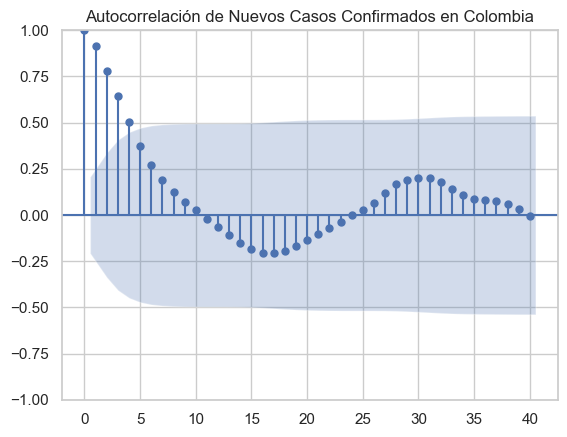

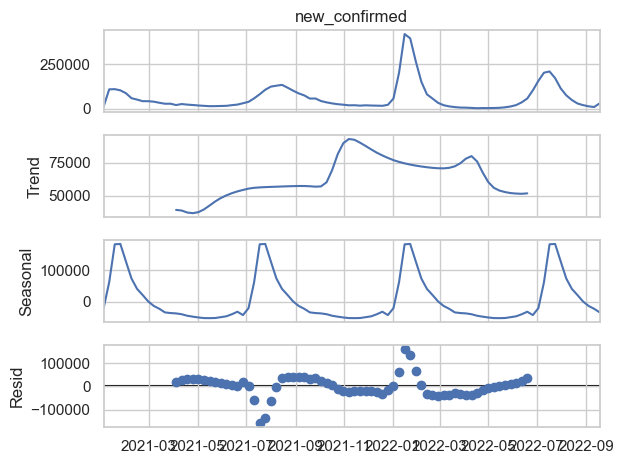

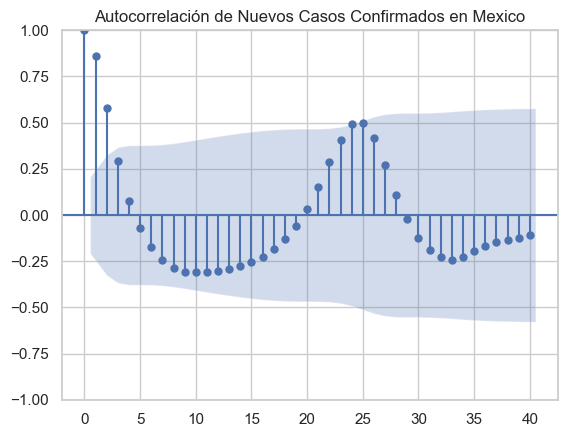

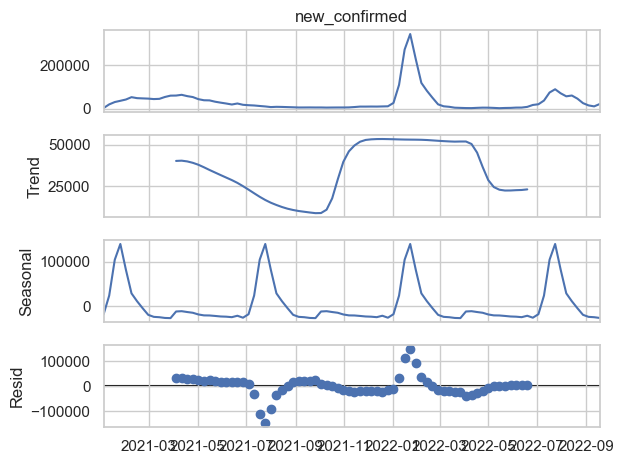

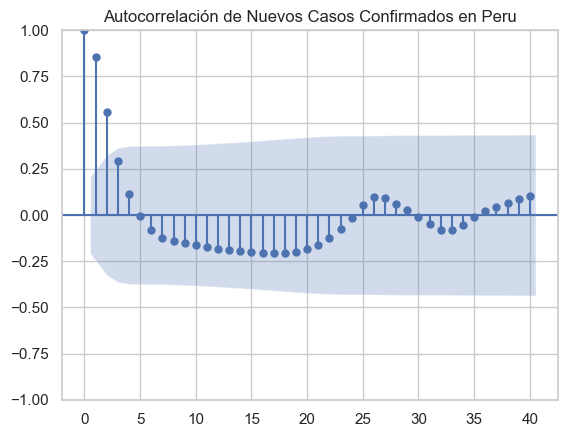

In [74]:
# Asegúrate de convertir la columna 'date' a datetime
data_latinoamerica_paises['date'] = pd.to_datetime(data_latinoamerica_paises['date'])

# Iterar sobre cada país en el DataFrame
paises_interes = data_latinoamerica_paises['country_name'].unique()

for pais in paises_interes:
    country_data = data_latinoamerica_paises[data_latinoamerica_paises['country_name'] == pais]
    country_data_weekly = country_data.resample('W', on='date').sum()

    # Descomposición de series temporales
    decomposition = seasonal_decompose(country_data_weekly['new_confirmed'], model='additive', period=26)
    decomposition.plot()
    plt.show()

    # Análisis de autocorrelación
    plot_acf(country_data_weekly['new_confirmed'].dropna(), lags=40)
    plt.title(f'Autocorrelación de Nuevos Casos Confirmados en {pais}')
    plt.show()


⏺ Covertura de vacunacion Vs. nuevos casos confirmados

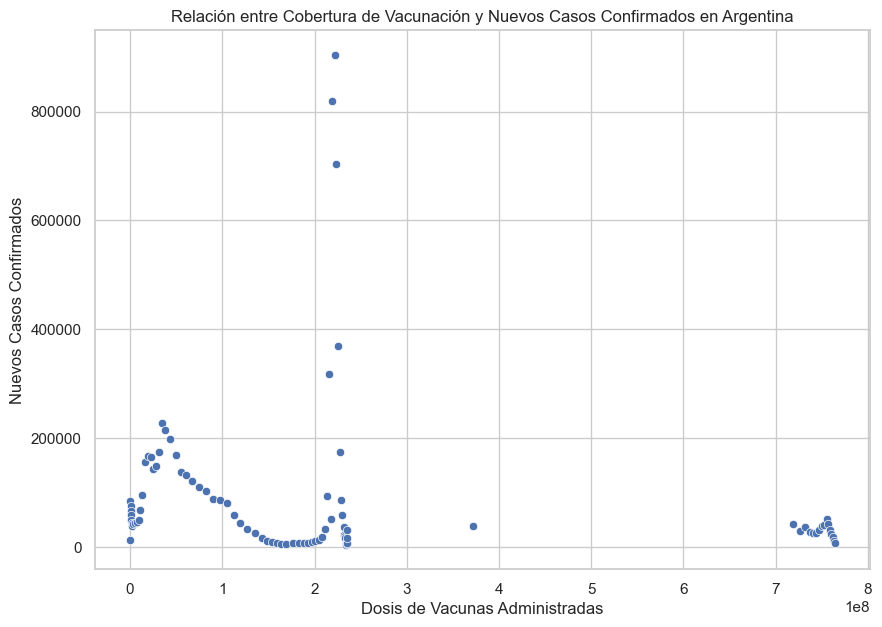

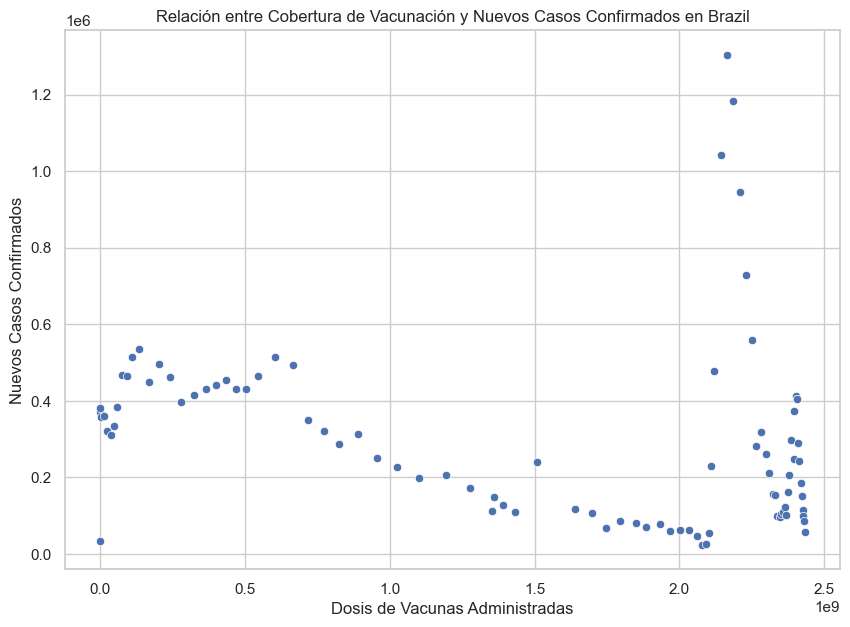

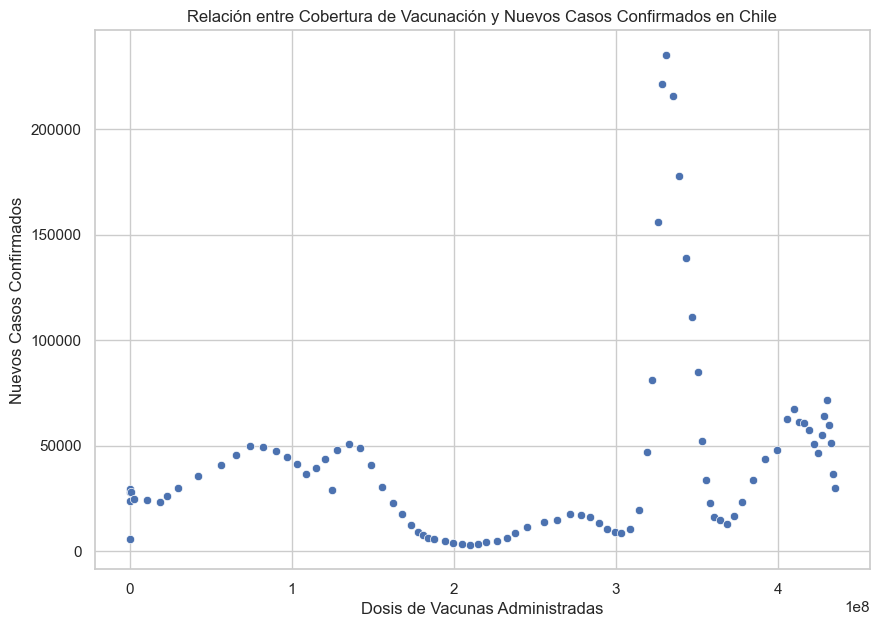

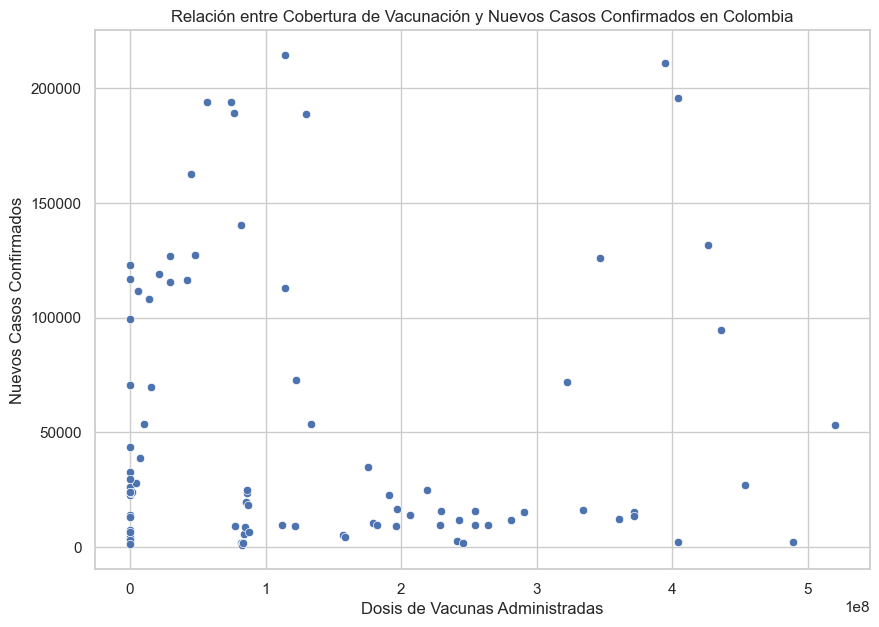

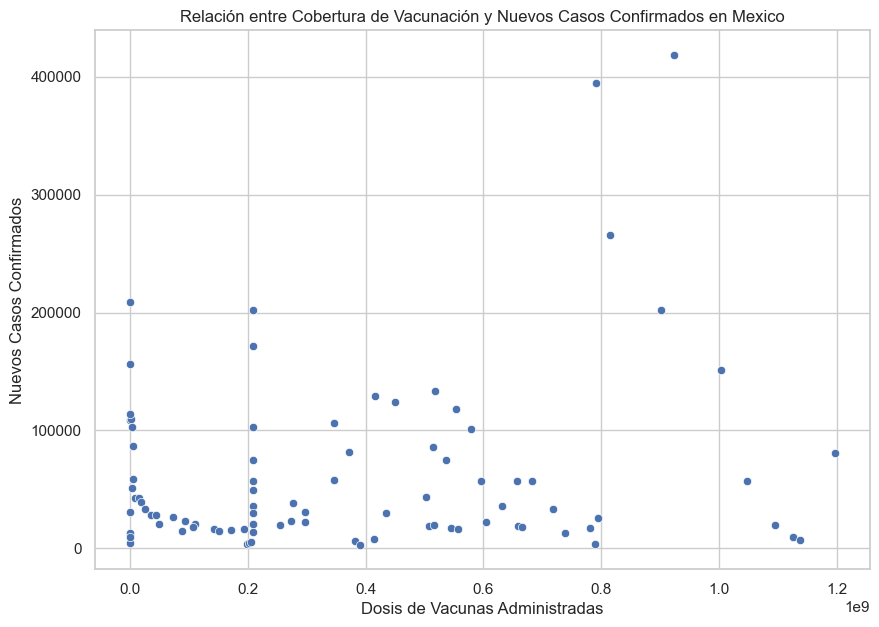

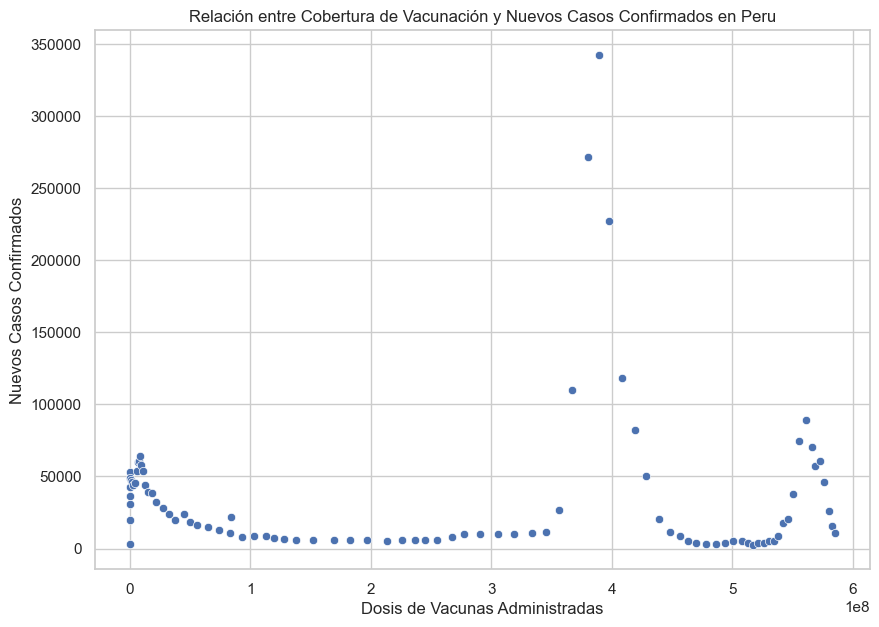

In [76]:
# Asegúrate de que la columna 'date' esté en formato datetime
data_latinoamerica_paises['date'] = pd.to_datetime(data_latinoamerica_paises['date'])

# Iterar sobre cada país en el DataFrame
paises_interes = data_latinoamerica_paises['country_name'].unique()

for pais in paises_interes:
    country_data = data_latinoamerica_paises[data_latinoamerica_paises['country_name'] == pais]
    country_data_weekly = country_data.resample('W', on='date').sum()

    # Cobertura de Vacunación vs. Nuevos Casos Confirmados
    plt.figure(figsize=(10, 7))
    sns.scatterplot(
        x='cumulative_vaccine_doses_administered',
        y='new_confirmed',
        data=country_data_weekly
    )
    plt.title(f'Relación entre Cobertura de Vacunación y Nuevos Casos Confirmados en {pais}')
    plt.xlabel('Dosis de Vacunas Administradas')
    plt.ylabel('Nuevos Casos Confirmados')
    plt.show()

   

⏺ Tasa de Crecimiento % de nuevos casos confirmados

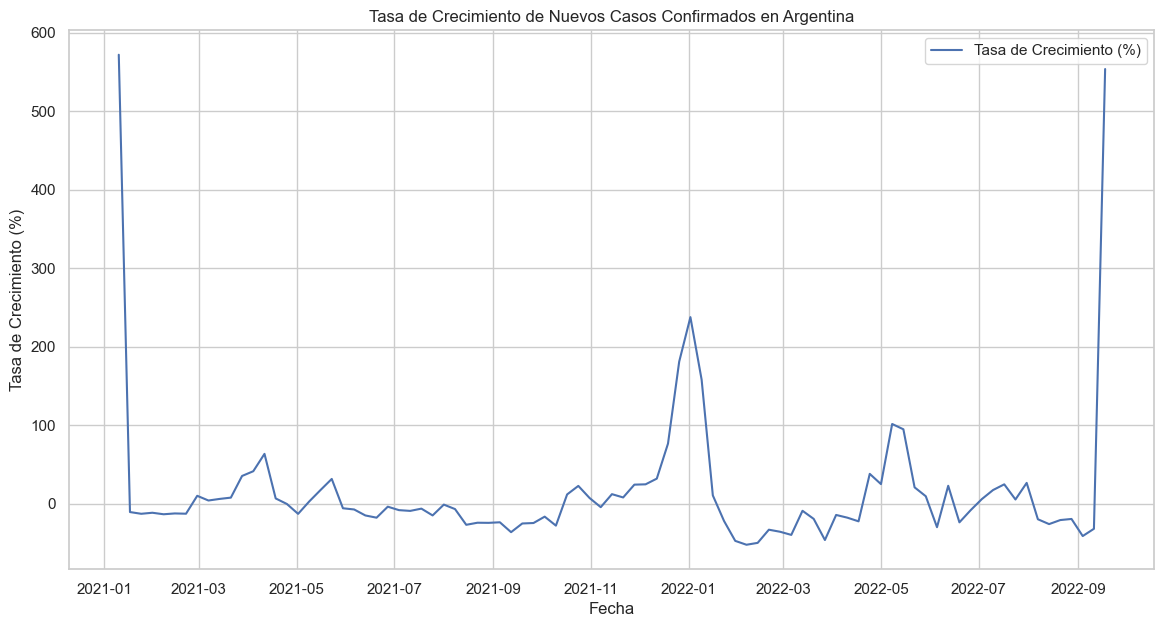

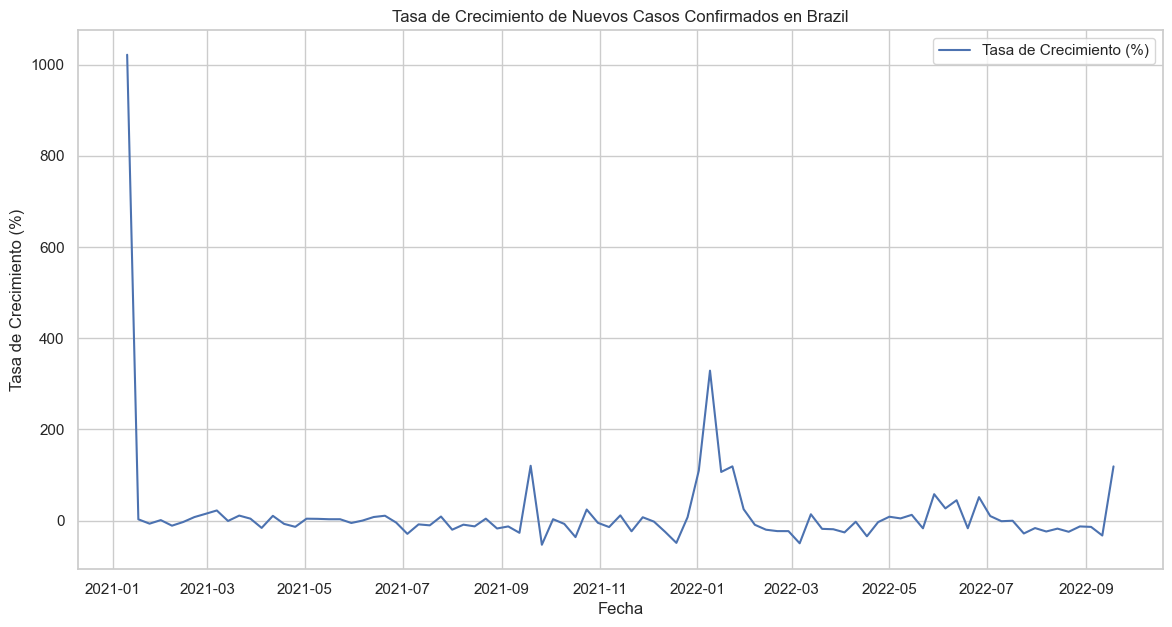

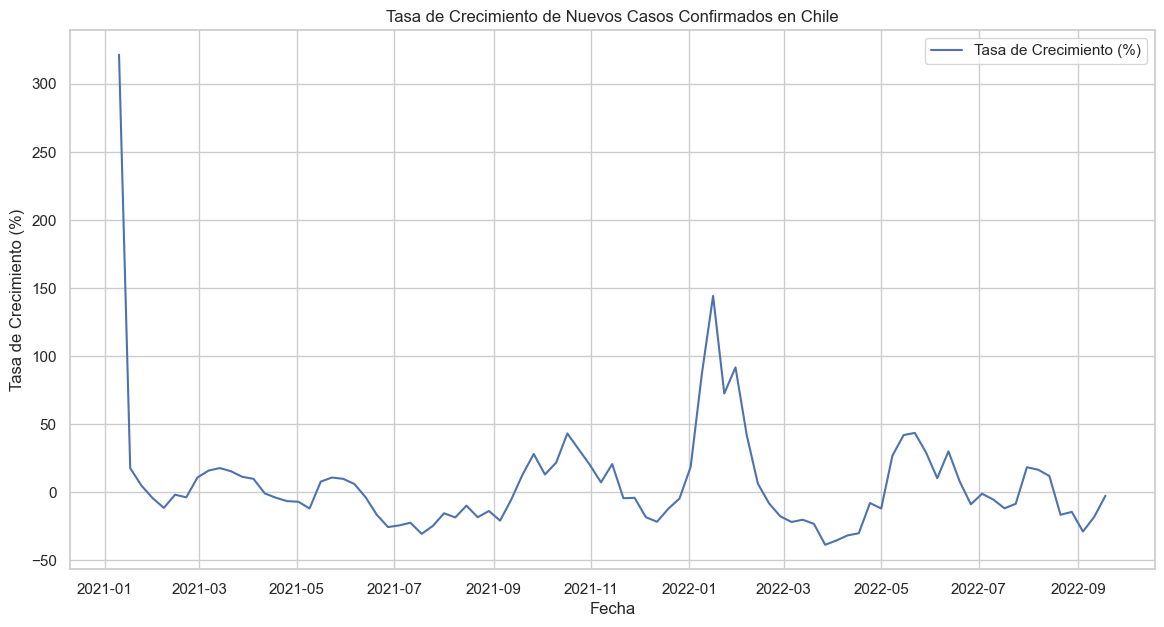

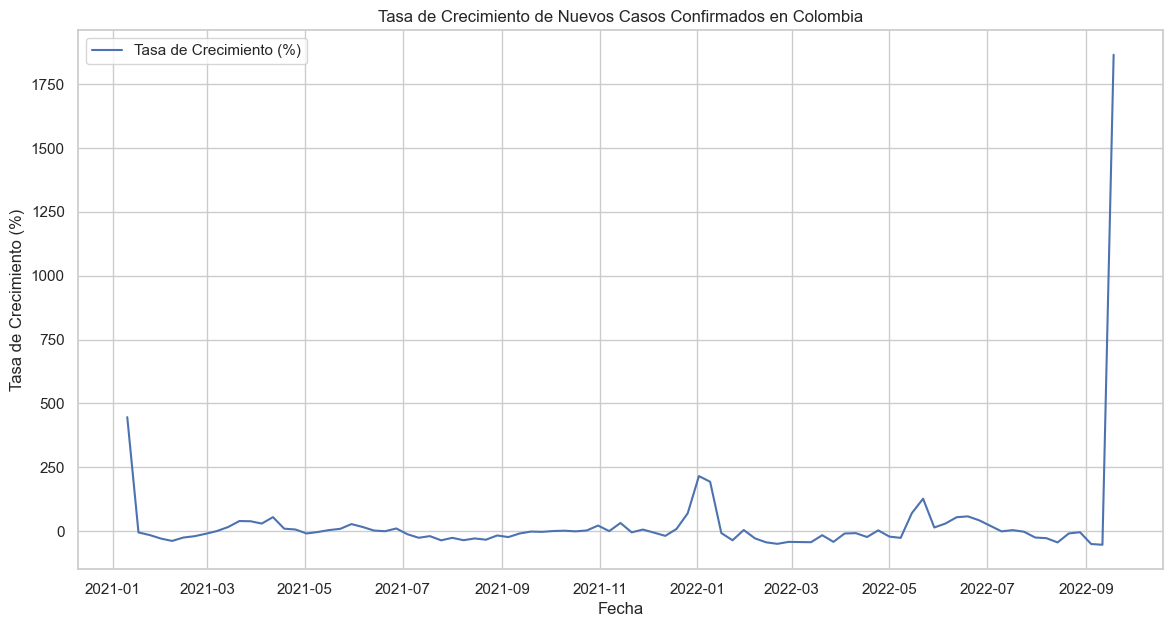

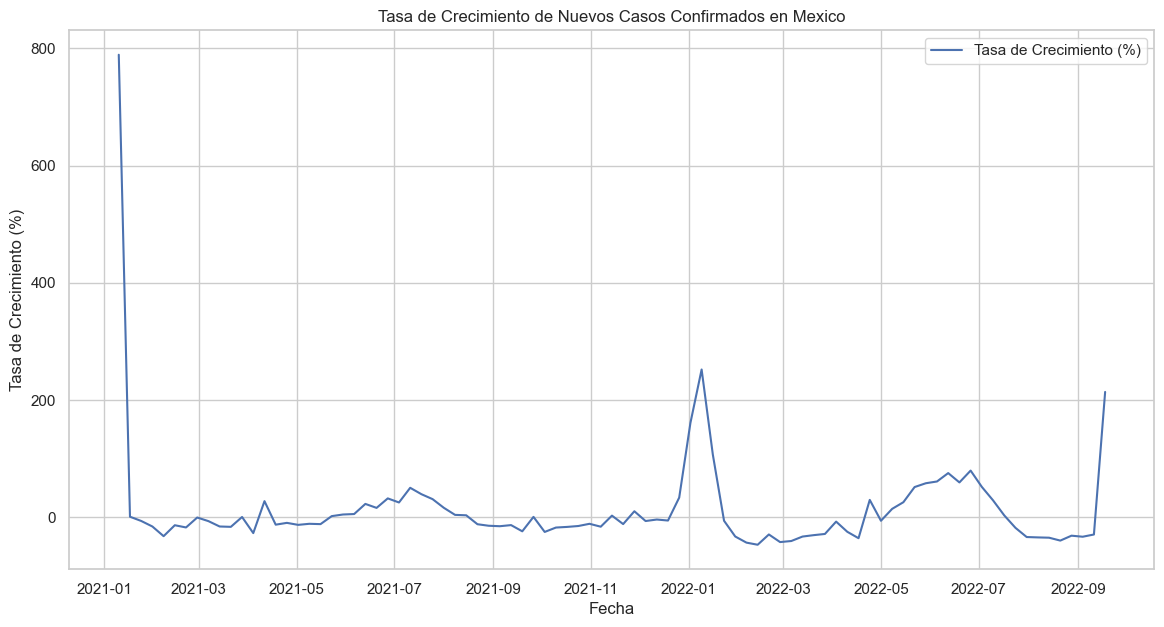

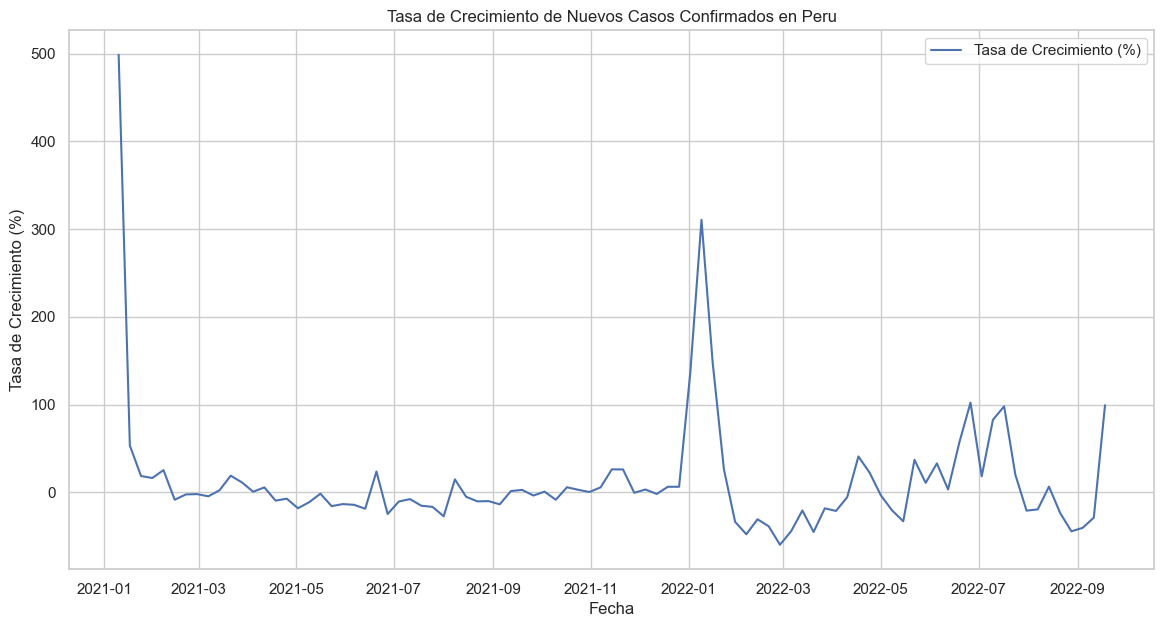

In [78]:
# Asegúrate de que la columna 'date' esté en formato datetime
data_latinoamerica_paises['date'] = pd.to_datetime(data_latinoamerica_paises['date'])

# Iterar sobre cada país en el DataFrame
paises_interes = data_latinoamerica_paises['country_name'].unique()

for pais in paises_interes:
    country_data = data_latinoamerica_paises[data_latinoamerica_paises['country_name'] == pais]
    country_data_weekly = country_data.resample('W', on='date').sum()

    # Tasa de crecimiento (%)
    country_data_weekly['growth_rate'] = country_data_weekly['new_confirmed'].pct_change() * 100

    # Gráfica de tasa de crecimiento
    plt.figure(figsize=(14, 7))
    plt.plot(country_data_weekly.index, country_data_weekly['growth_rate'], label='Tasa de Crecimiento (%)')
    plt.title(f'Tasa de Crecimiento de Nuevos Casos Confirmados en {pais}')
    plt.xlabel('Fecha')
    plt.ylabel('Tasa de Crecimiento (%)')
    plt.legend()
    plt.show()


⏺Evolucion semanal de nuevos casos

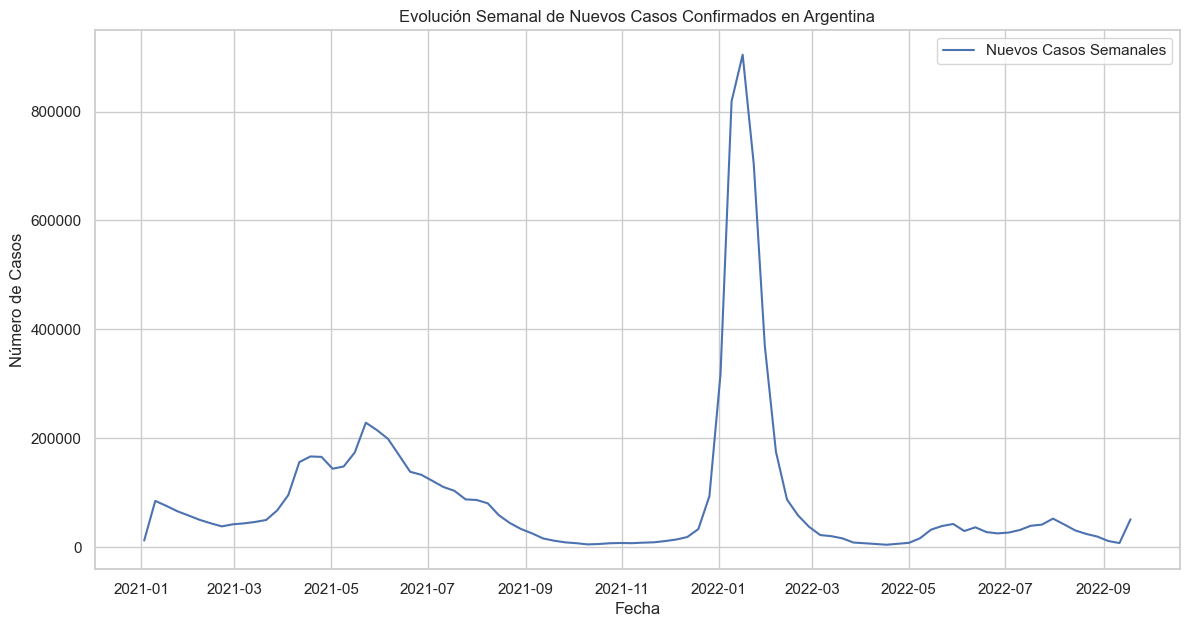

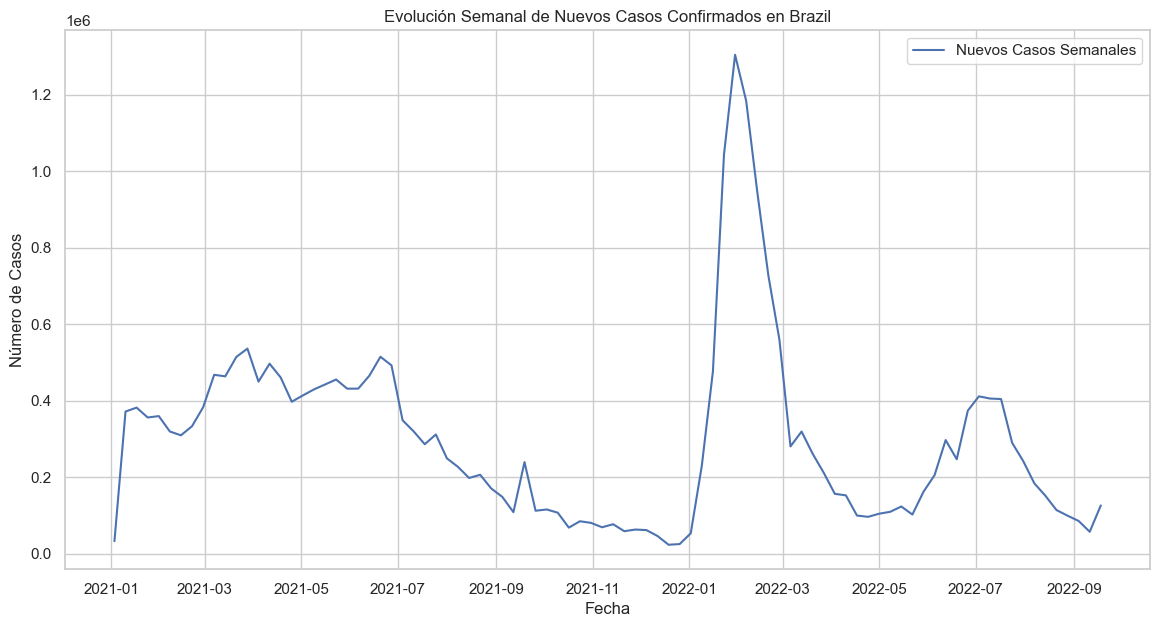

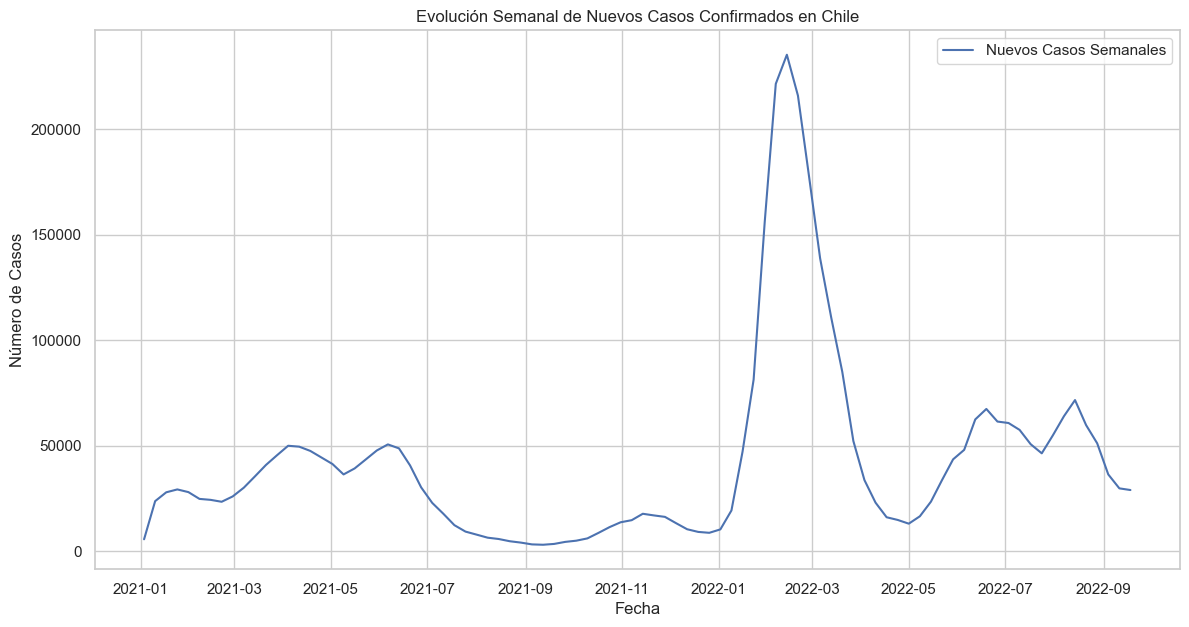

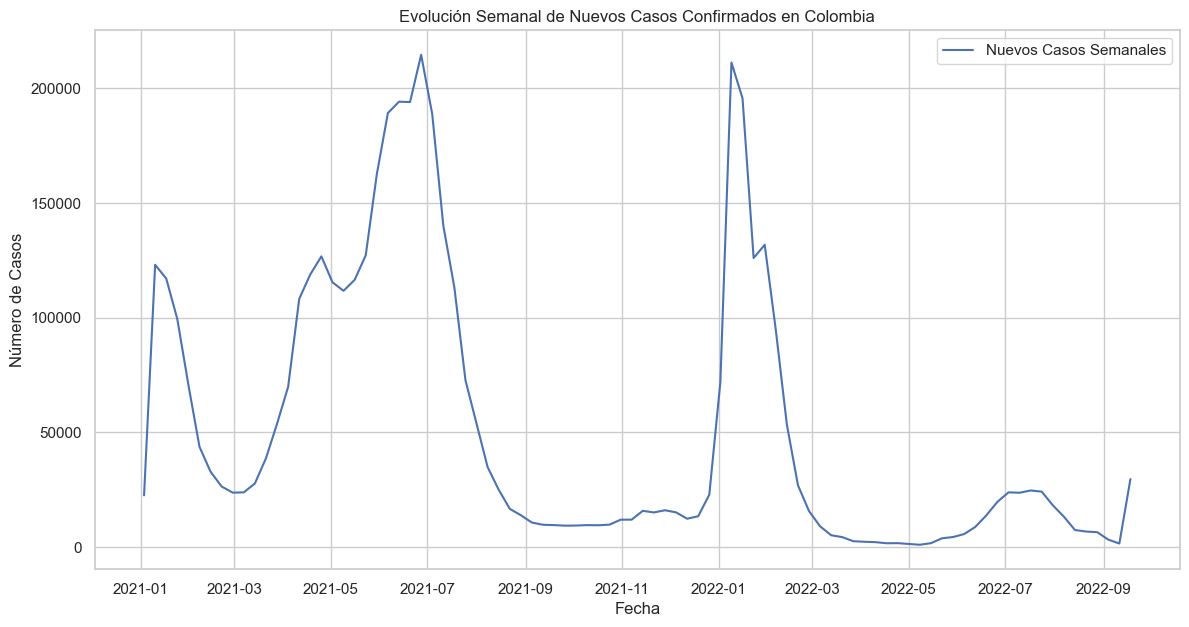

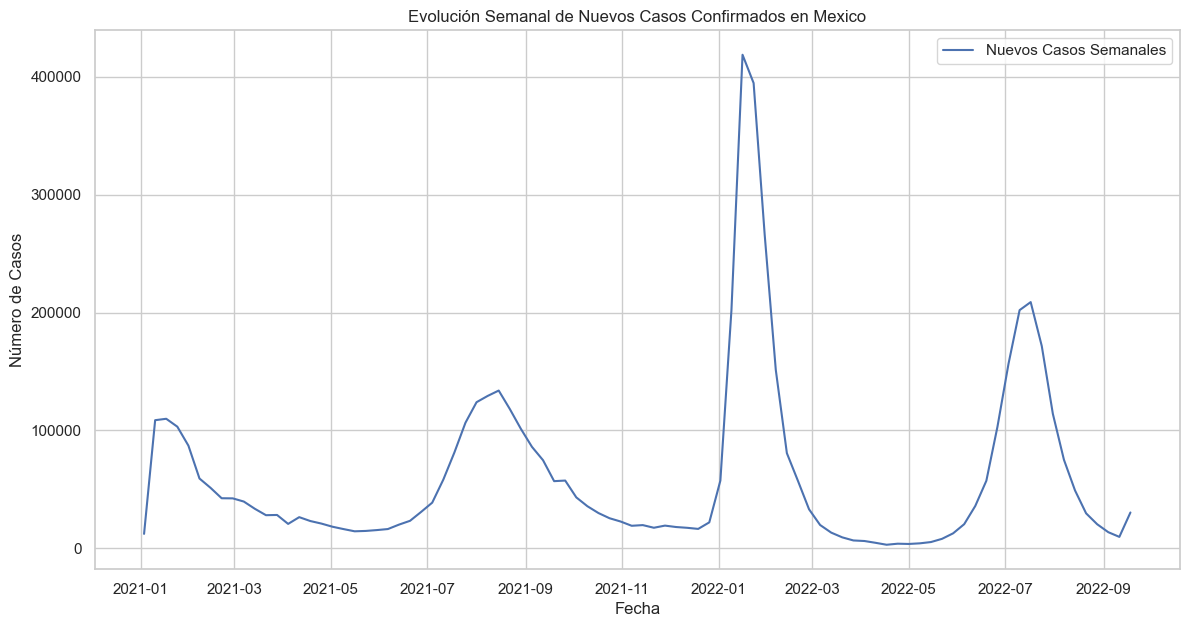

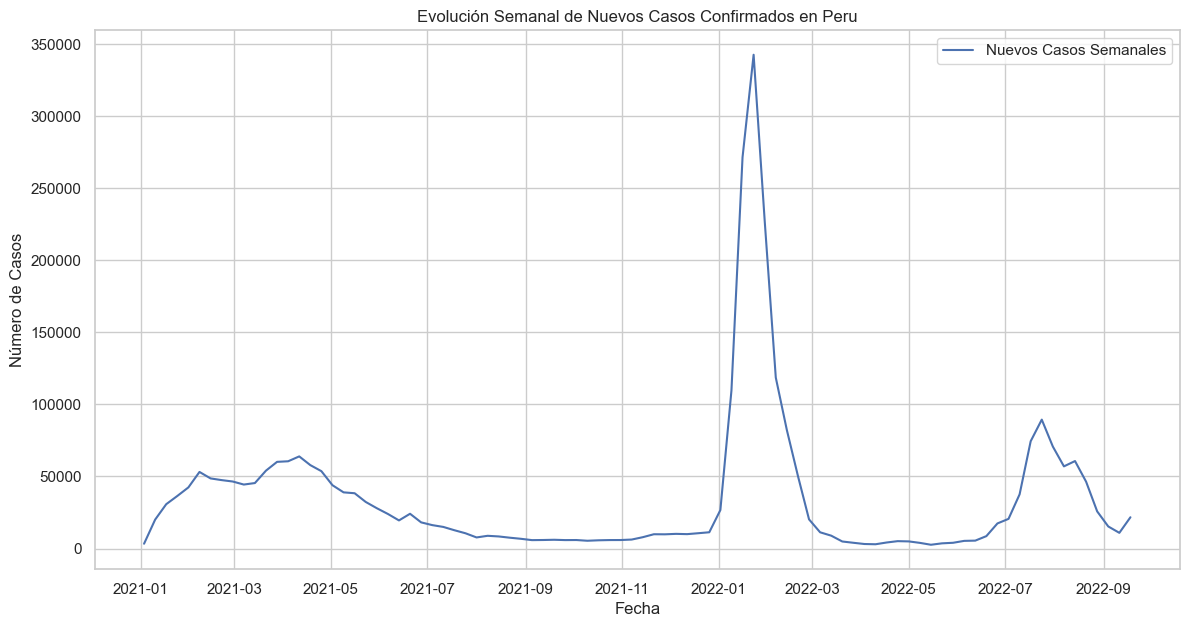

In [80]:
# Asegurarse de que la columna 'date' esté en formato datetime
data_latinoamerica_paises['date'] = pd.to_datetime(data_latinoamerica_paises['date'])

# Iterar sobre cada país en el DataFrame
paises_interes = data_latinoamerica_paises['country_name'].unique()

for pais in paises_interes:
    country_data = data_latinoamerica_paises[data_latinoamerica_paises['country_name'] == pais]
    country_data_weekly = country_data.resample('W', on='date').sum()

    # Evolución Semanal de Casos Nuevos
    plt.figure(figsize=(14, 7))
    plt.plot(country_data_weekly.index, country_data_weekly['new_confirmed'], label='Nuevos Casos Semanales')
    plt.title(f'Evolución Semanal de Nuevos Casos Confirmados en {pais}')
    plt.xlabel('Fecha')
    plt.ylabel('Número de Casos')
    plt.legend()
    plt.show()
  


⏺A continuacion se realiza un analisis enfocado en la identificacion de disponibilidad de infraestructura sanitaria

In [81]:
# Crear un DataFrame con los datos agrupados por país
df_infraestructura = data_latinoamerica_paises.groupby('country_name').agg({
    'human_development_index': 'mean',
    'nurses_per_1000': 'mean',
    'physicians_per_1000': 'mean',
    'population': 'mean'
}).reset_index()


⏺Analisis del Indice de Desarrollo Humano

C:\Users\Asus\AppData\Local\Temp\ipykernel_11748\175257178.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country_name', y='human_development_index', data=df_infraestructura, palette='viridis')


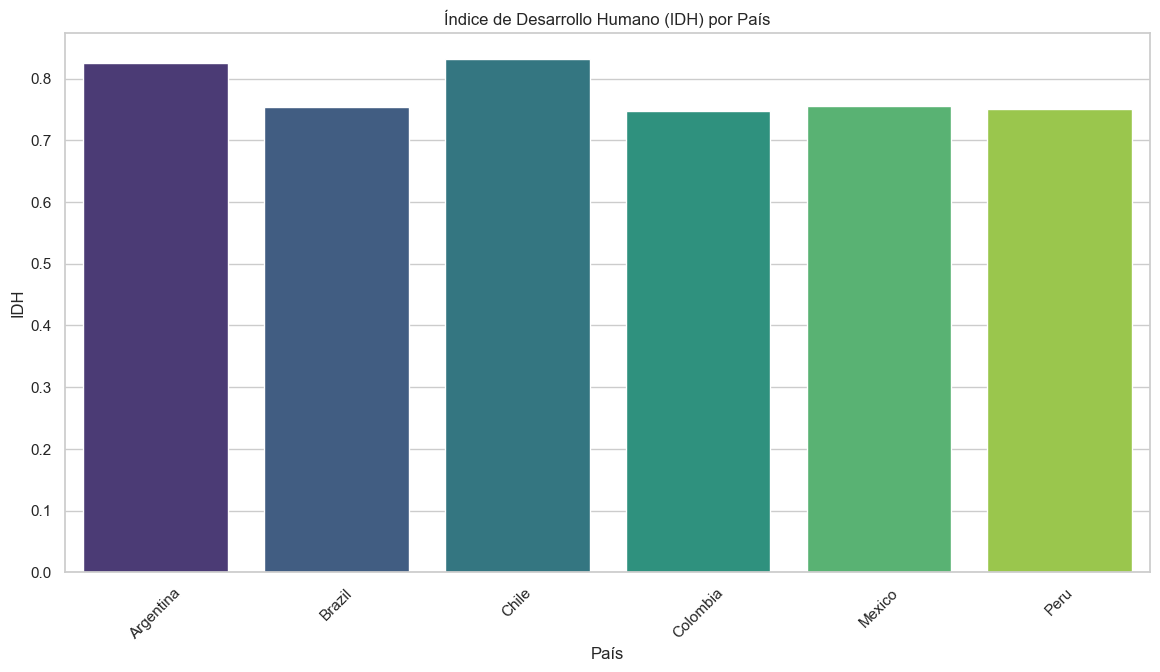

In [82]:
plt.figure(figsize=(14, 7))
sns.barplot(x='country_name', y='human_development_index', data=df_infraestructura, palette='viridis')
plt.title('Índice de Desarrollo Humano (IDH) por País')
plt.xlabel('País')
plt.ylabel('IDH')
plt.xticks(rotation=45)
plt.show()


⏺Análisis de la Densidad de Médicos y Enfermeras

C:\Users\Asus\AppData\Local\Temp\ipykernel_11748\4284471106.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country_name', y='nurses_per_1000', data=df_infraestructura, palette='coolwarm')


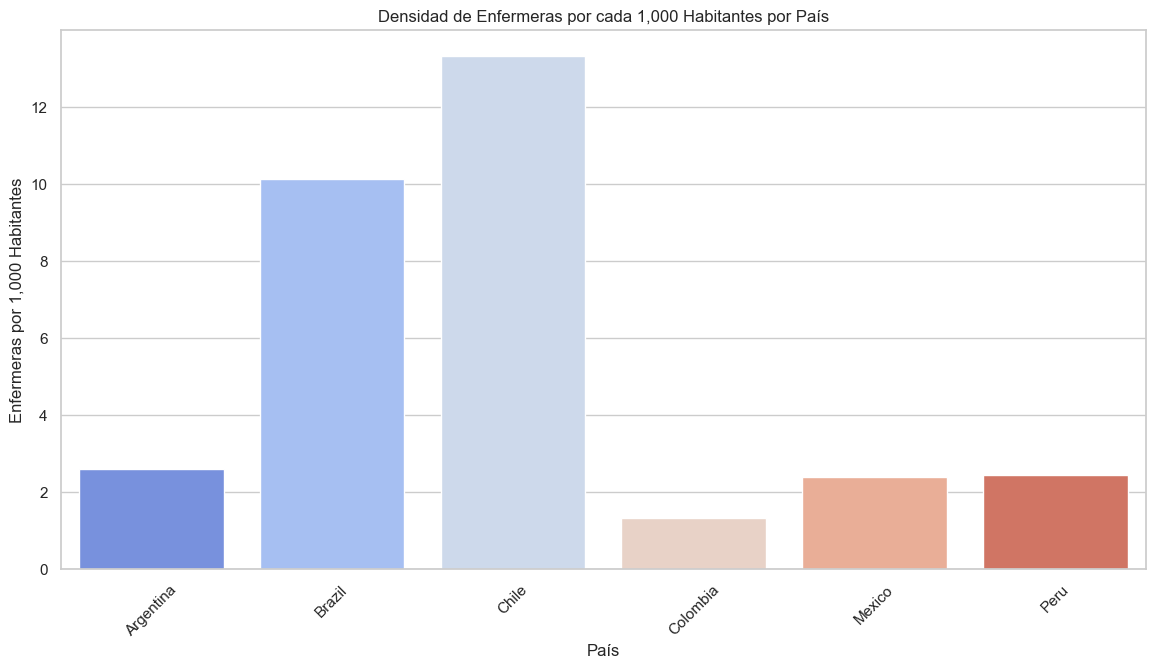

C:\Users\Asus\AppData\Local\Temp\ipykernel_11748\4284471106.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country_name', y='physicians_per_1000', data=df_infraestructura, palette='coolwarm')


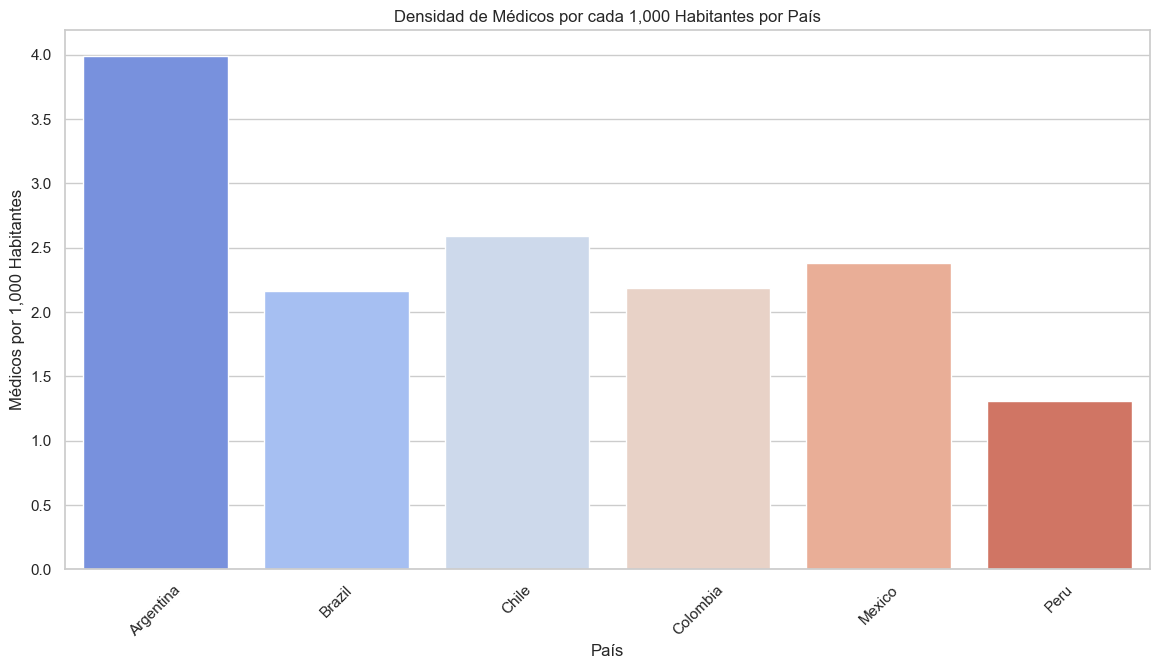

In [83]:
# Densidad de Enfermeras
plt.figure(figsize=(14, 7))
sns.barplot(x='country_name', y='nurses_per_1000', data=df_infraestructura, palette='coolwarm')
plt.title('Densidad de Enfermeras por cada 1,000 Habitantes por País')
plt.xlabel('País')
plt.ylabel('Enfermeras por 1,000 Habitantes')
plt.xticks(rotation=45)
plt.show()

# Densidad de Médicos
plt.figure(figsize=(14, 7))
sns.barplot(x='country_name', y='physicians_per_1000', data=df_infraestructura, palette='coolwarm')
plt.title('Densidad de Médicos por cada 1,000 Habitantes por País')
plt.xlabel('País')
plt.ylabel('Médicos por 1,000 Habitantes')
plt.xticks(rotation=45)
plt.show()


⏺Analisis de correlacion de variables

In [84]:

# Selección de variables clave para el análisis de correlación
variables_clave = [
    'new_confirmed', 'new_deceased', 'cumulative_vaccine_doses_administered',
    'population', 'population_male', 'population_female', 'population_rural',
    'population_urban', 'population_density', 'nurses_per_1000',
    'physicians_per_1000', 'cumulative_recovered', 'human_development_index'
]

# Calcular la matriz de correlaciones
correlaciones = data_latinoamerica_paises[variables_clave].corr()


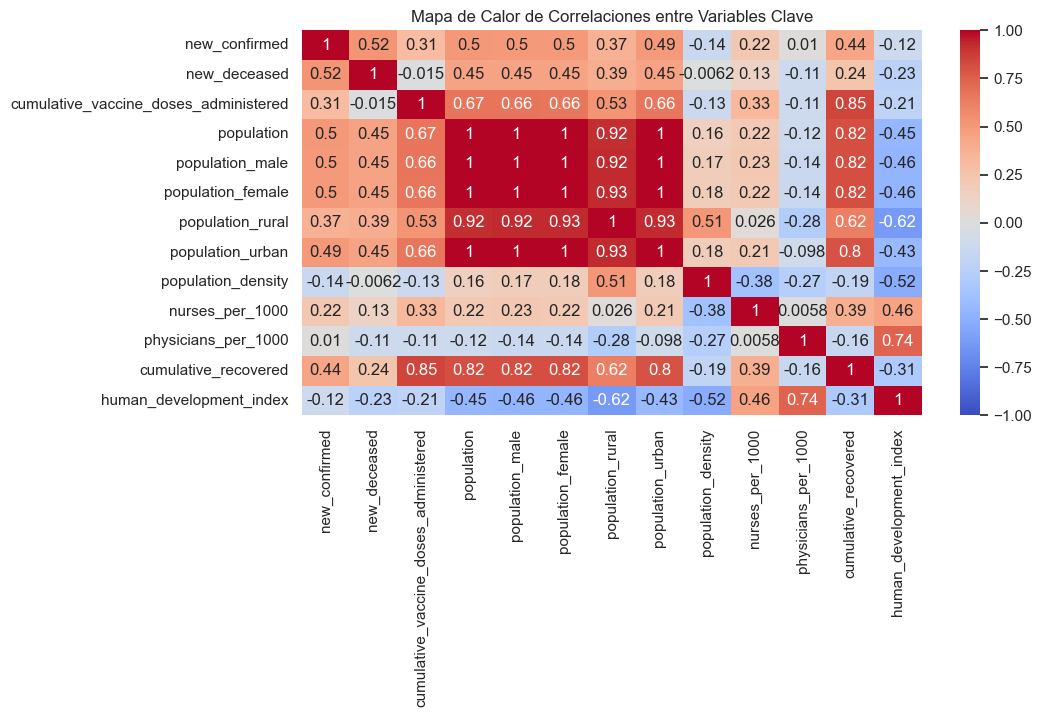

In [85]:
plt.figure(figsize=(10, 5))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de Calor de Correlaciones entre Variables Clave')
plt.show()


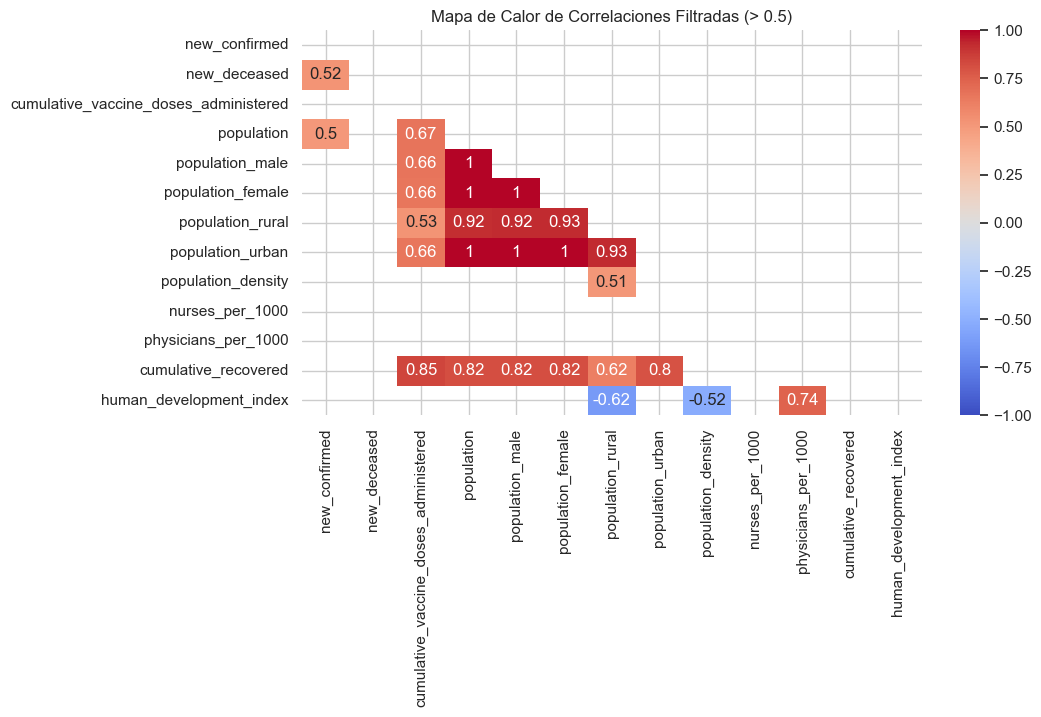

In [86]:

# Calcular la matriz de correlaciones
correlaciones = data_latinoamerica_paises[variables_clave].corr()

# Crear una máscara para ocultar la parte superior del mapa de calor
mask = np.triu(np.ones_like(correlaciones, dtype=bool))

# Crear una submáscara para filtrar las correlaciones significativas (> 0.5)
submask = correlaciones.where(np.abs(correlaciones) > 0.5)

# Crear un mapa de calor con la submáscara
plt.figure(figsize=(10, 5))
sns.heatmap(submask, annot=True, cmap='coolwarm', vmin=-1, vmax=1, mask=mask)
plt.title('Mapa de Calor de Correlaciones Filtradas (> 0.5)')
plt.show()

